In [ ]:
# plotting the loss landscape of hsearch for mixed and cyclic hsearch

# CYCLIC

Extracted 324 data points.
lam_h range: 1.00097191235676e-05 to 895.71453521278
lam_l1 range: 1.0995963700215668e-05 to 751.6677625538456
avg_css range: 3.350931490156088 to 85520853.92911924
log10(lam_h) range: -4.999578108814 to 2.952169621787852
log10(lam_l1) range: -4.958766702515551 to 2.876025924670469
log10(avg_css) range: 0.5251655487689272 to 7.932072028670003


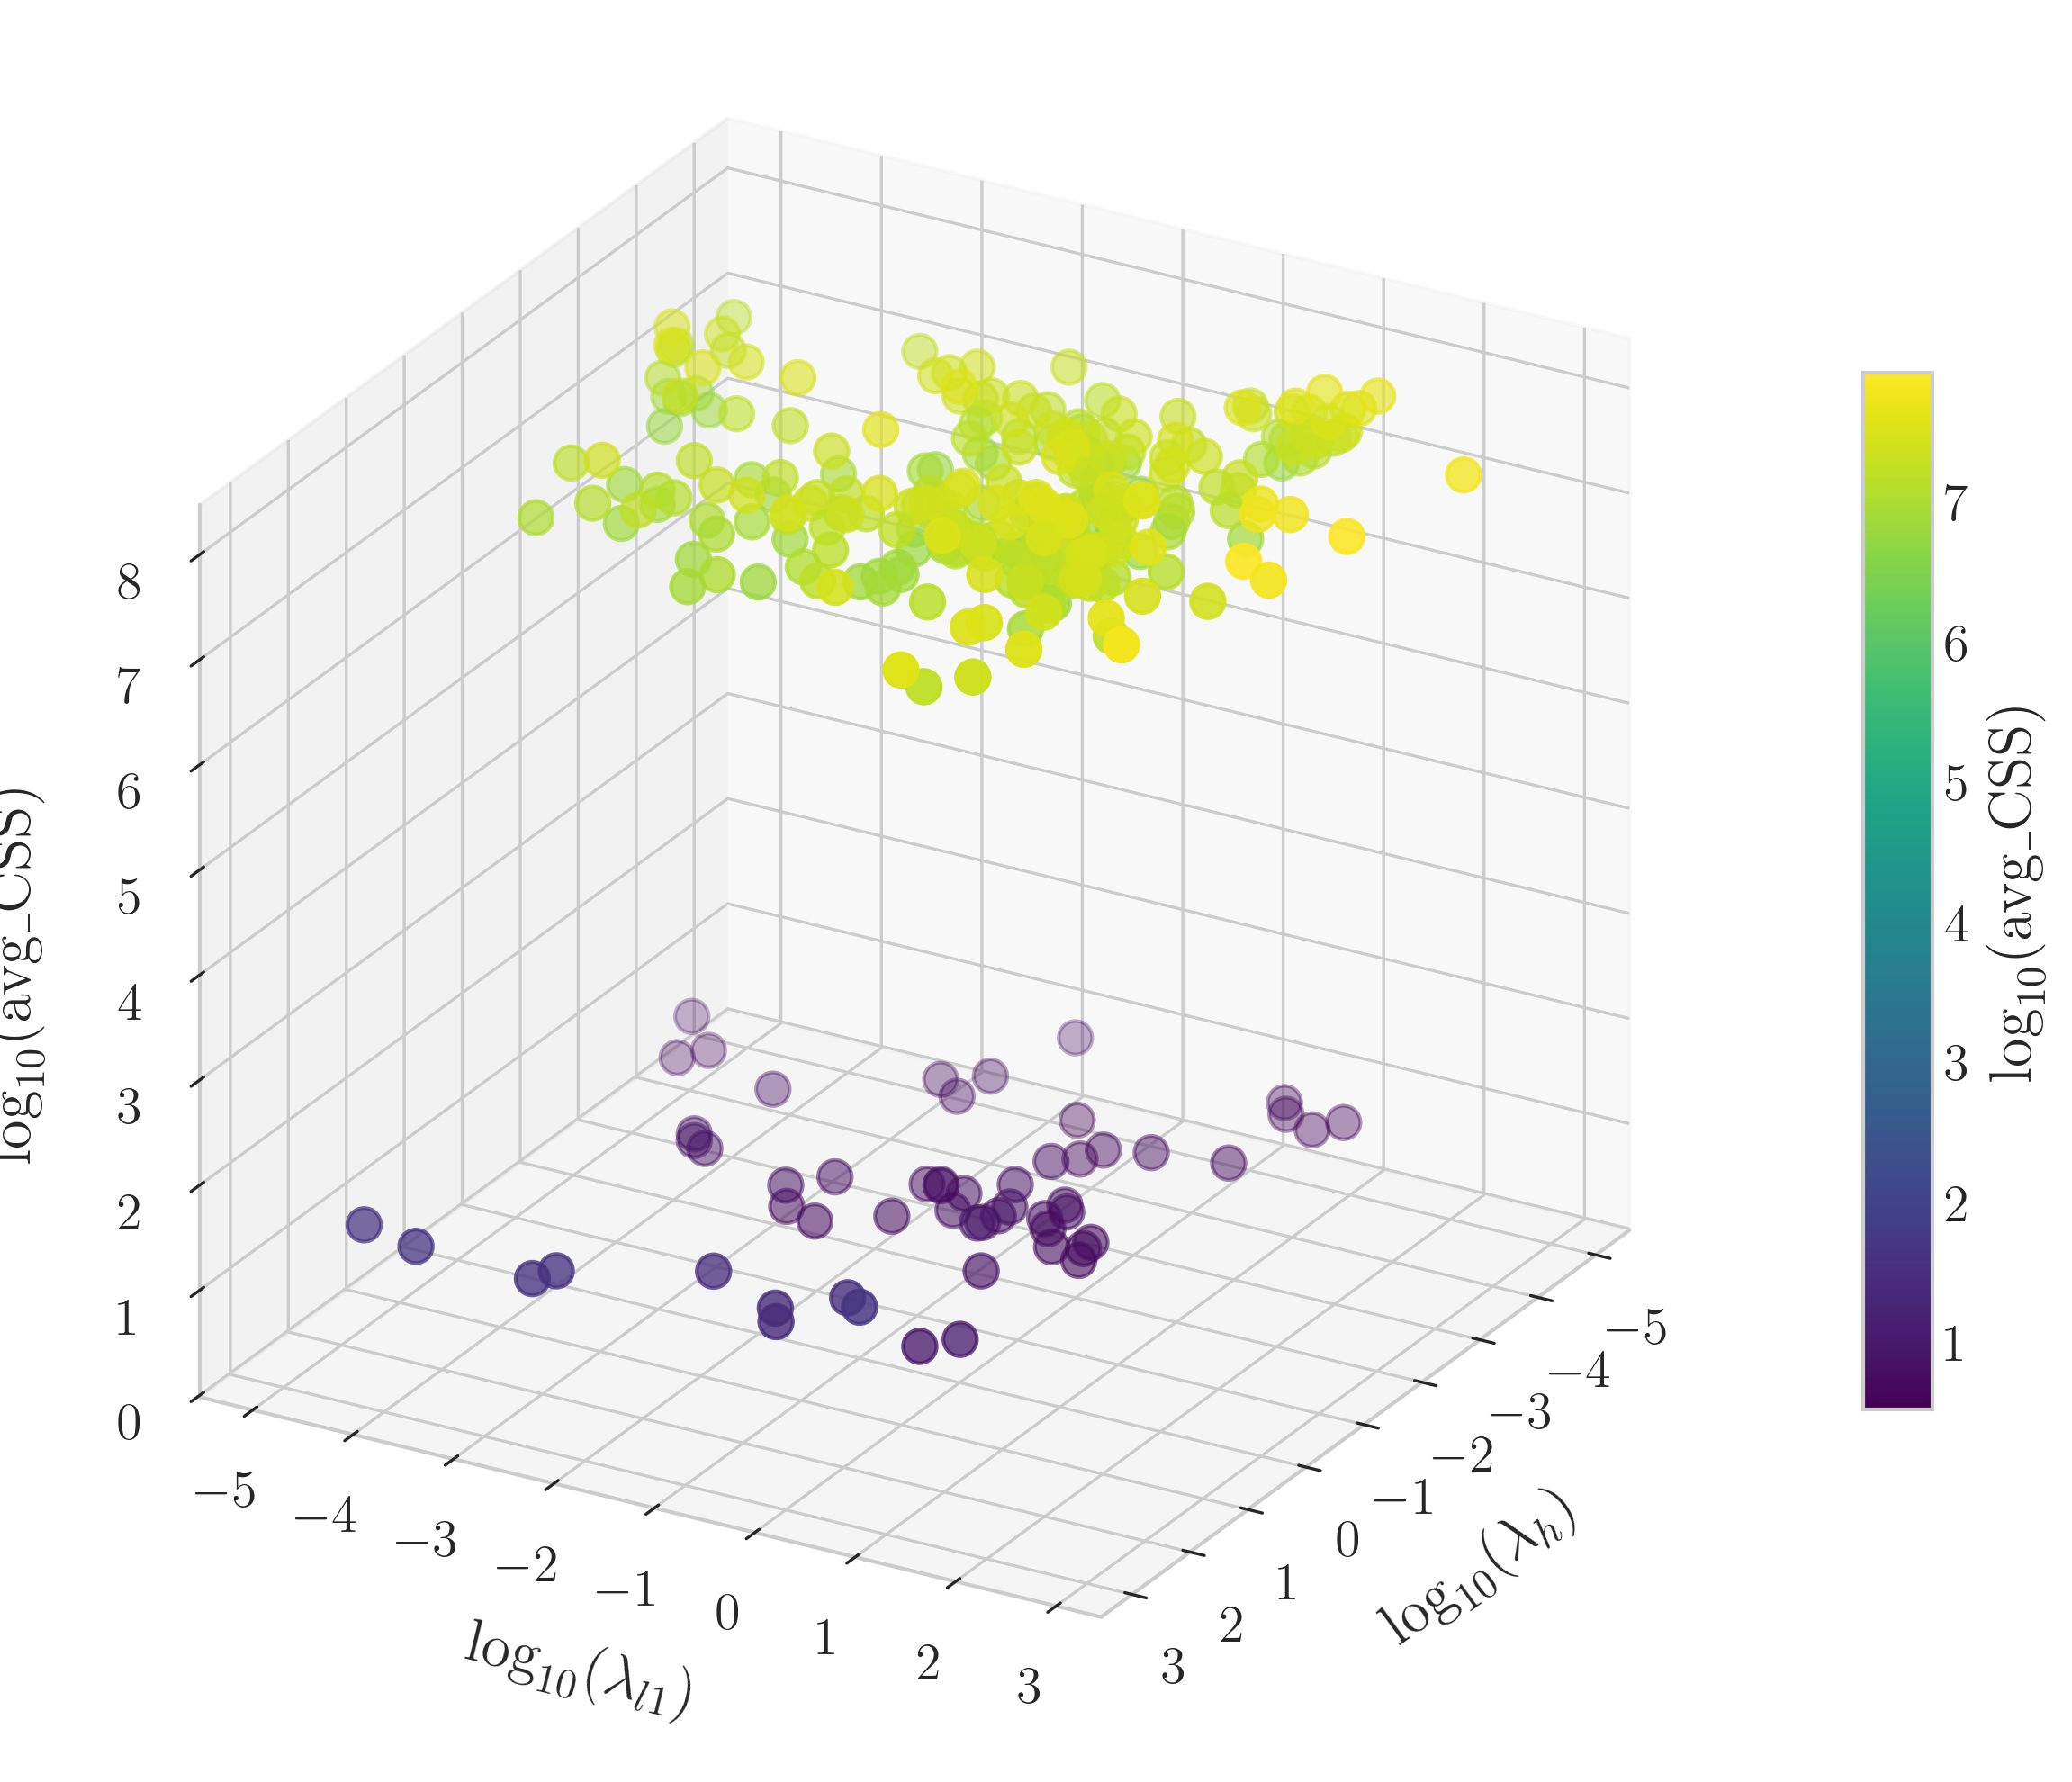

In [21]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Use a clean, publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except OSError:
    plt.style.use("default")

file_path = "hsearch_cyclic_intermediate_best.txt"

lam_h_vals = []
lam_l1_vals = []
avg_css_vals = []

# Regular expression to extract lam_h, lam_l1, and avg_normalized_CSS.
pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalized_CSS=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_css_vals.append(float(match.group(3)))

print(f"Extracted {len(lam_h_vals)} data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted from the file. Check the file format and regex.")

lam_h_array = np.array(lam_h_vals)
lam_l1_array = np.array(lam_l1_vals)
avg_css_array = np.array(avg_css_vals)

print("lam_h range:", lam_h_array.min(), "to", lam_h_array.max())
print("lam_l1 range:", lam_l1_array.min(), "to", lam_l1_array.max())
print("avg_css range:", avg_css_array.min(), "to", avg_css_array.max())

# Filter out any non-positive values (shouldn't happen, but it's a safety measure).
mask = (lam_h_array > 0) & (lam_l1_array > 0) & (avg_css_array > 0)
if not np.all(mask):
    print("WARNING: Some values are non-positive. Ignoring those points.")
    lam_h_array = lam_h_array[mask]
    lam_l1_array = lam_l1_array[mask]
    avg_css_array = avg_css_array[mask]

# Transform the data by taking log10.
X = np.log10(lam_h_array)
Y = np.log10(lam_l1_array)
Z = np.log10(avg_css_array)

print("log10(lam_h) range:", X.min(), "to", X.max())
print("log10(lam_l1) range:", Y.min(), "to", Y.max())
print("log10(avg_css) range:", Z.min(), "to", Z.max())

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "figure.dpi": 300,
})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the log-transformed data in linear space.
sc = ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o', s=80)

# Set the aspect ratio using the ranges in log space.
x_min, x_max = X.min(), X.max()
y_min, y_max = Y.min(), Y.max()
z_min, z_max = Z.min(), Z.max()
ax.set_box_aspect((x_max - x_min, y_max - y_min, z_max - z_min))

ax.set_xlabel(r"$\log_{10}(\lambda_h)$", labelpad=10)
ax.set_ylabel(r"$\log_{10}(\lambda_{l1})$", labelpad=10)
ax.set_zlabel(r"$\log_{10}(\mathrm{avg\_CSS})$", labelpad=10)

# Use orthographic projection to reduce perspective distortion.
ax.set_proj_type("ortho")

ax.tick_params(axis="both", which="major", labelsize=14)
ax.view_init(elev=25, azim=30)

cbar = fig.colorbar(sc, shrink=0.6, aspect=15)
cbar.set_label(r"$\log_{10}(\mathrm{avg\_CSS})$", fontsize=16)
cbar.ax.tick_params(labelsize=14)

fig.subplots_adjust(top=0.90, bottom=0.1, left=0.1, right=0.9)
plt.show()


Extracted 324 data points.
lam_h range: 1.00097191235676e-05 to 895.71453521278
lam_l1 range: 1.0995963700215668e-05 to 751.6677625538456
avg_css range: 3.350931490156088 to 85520853.92911924


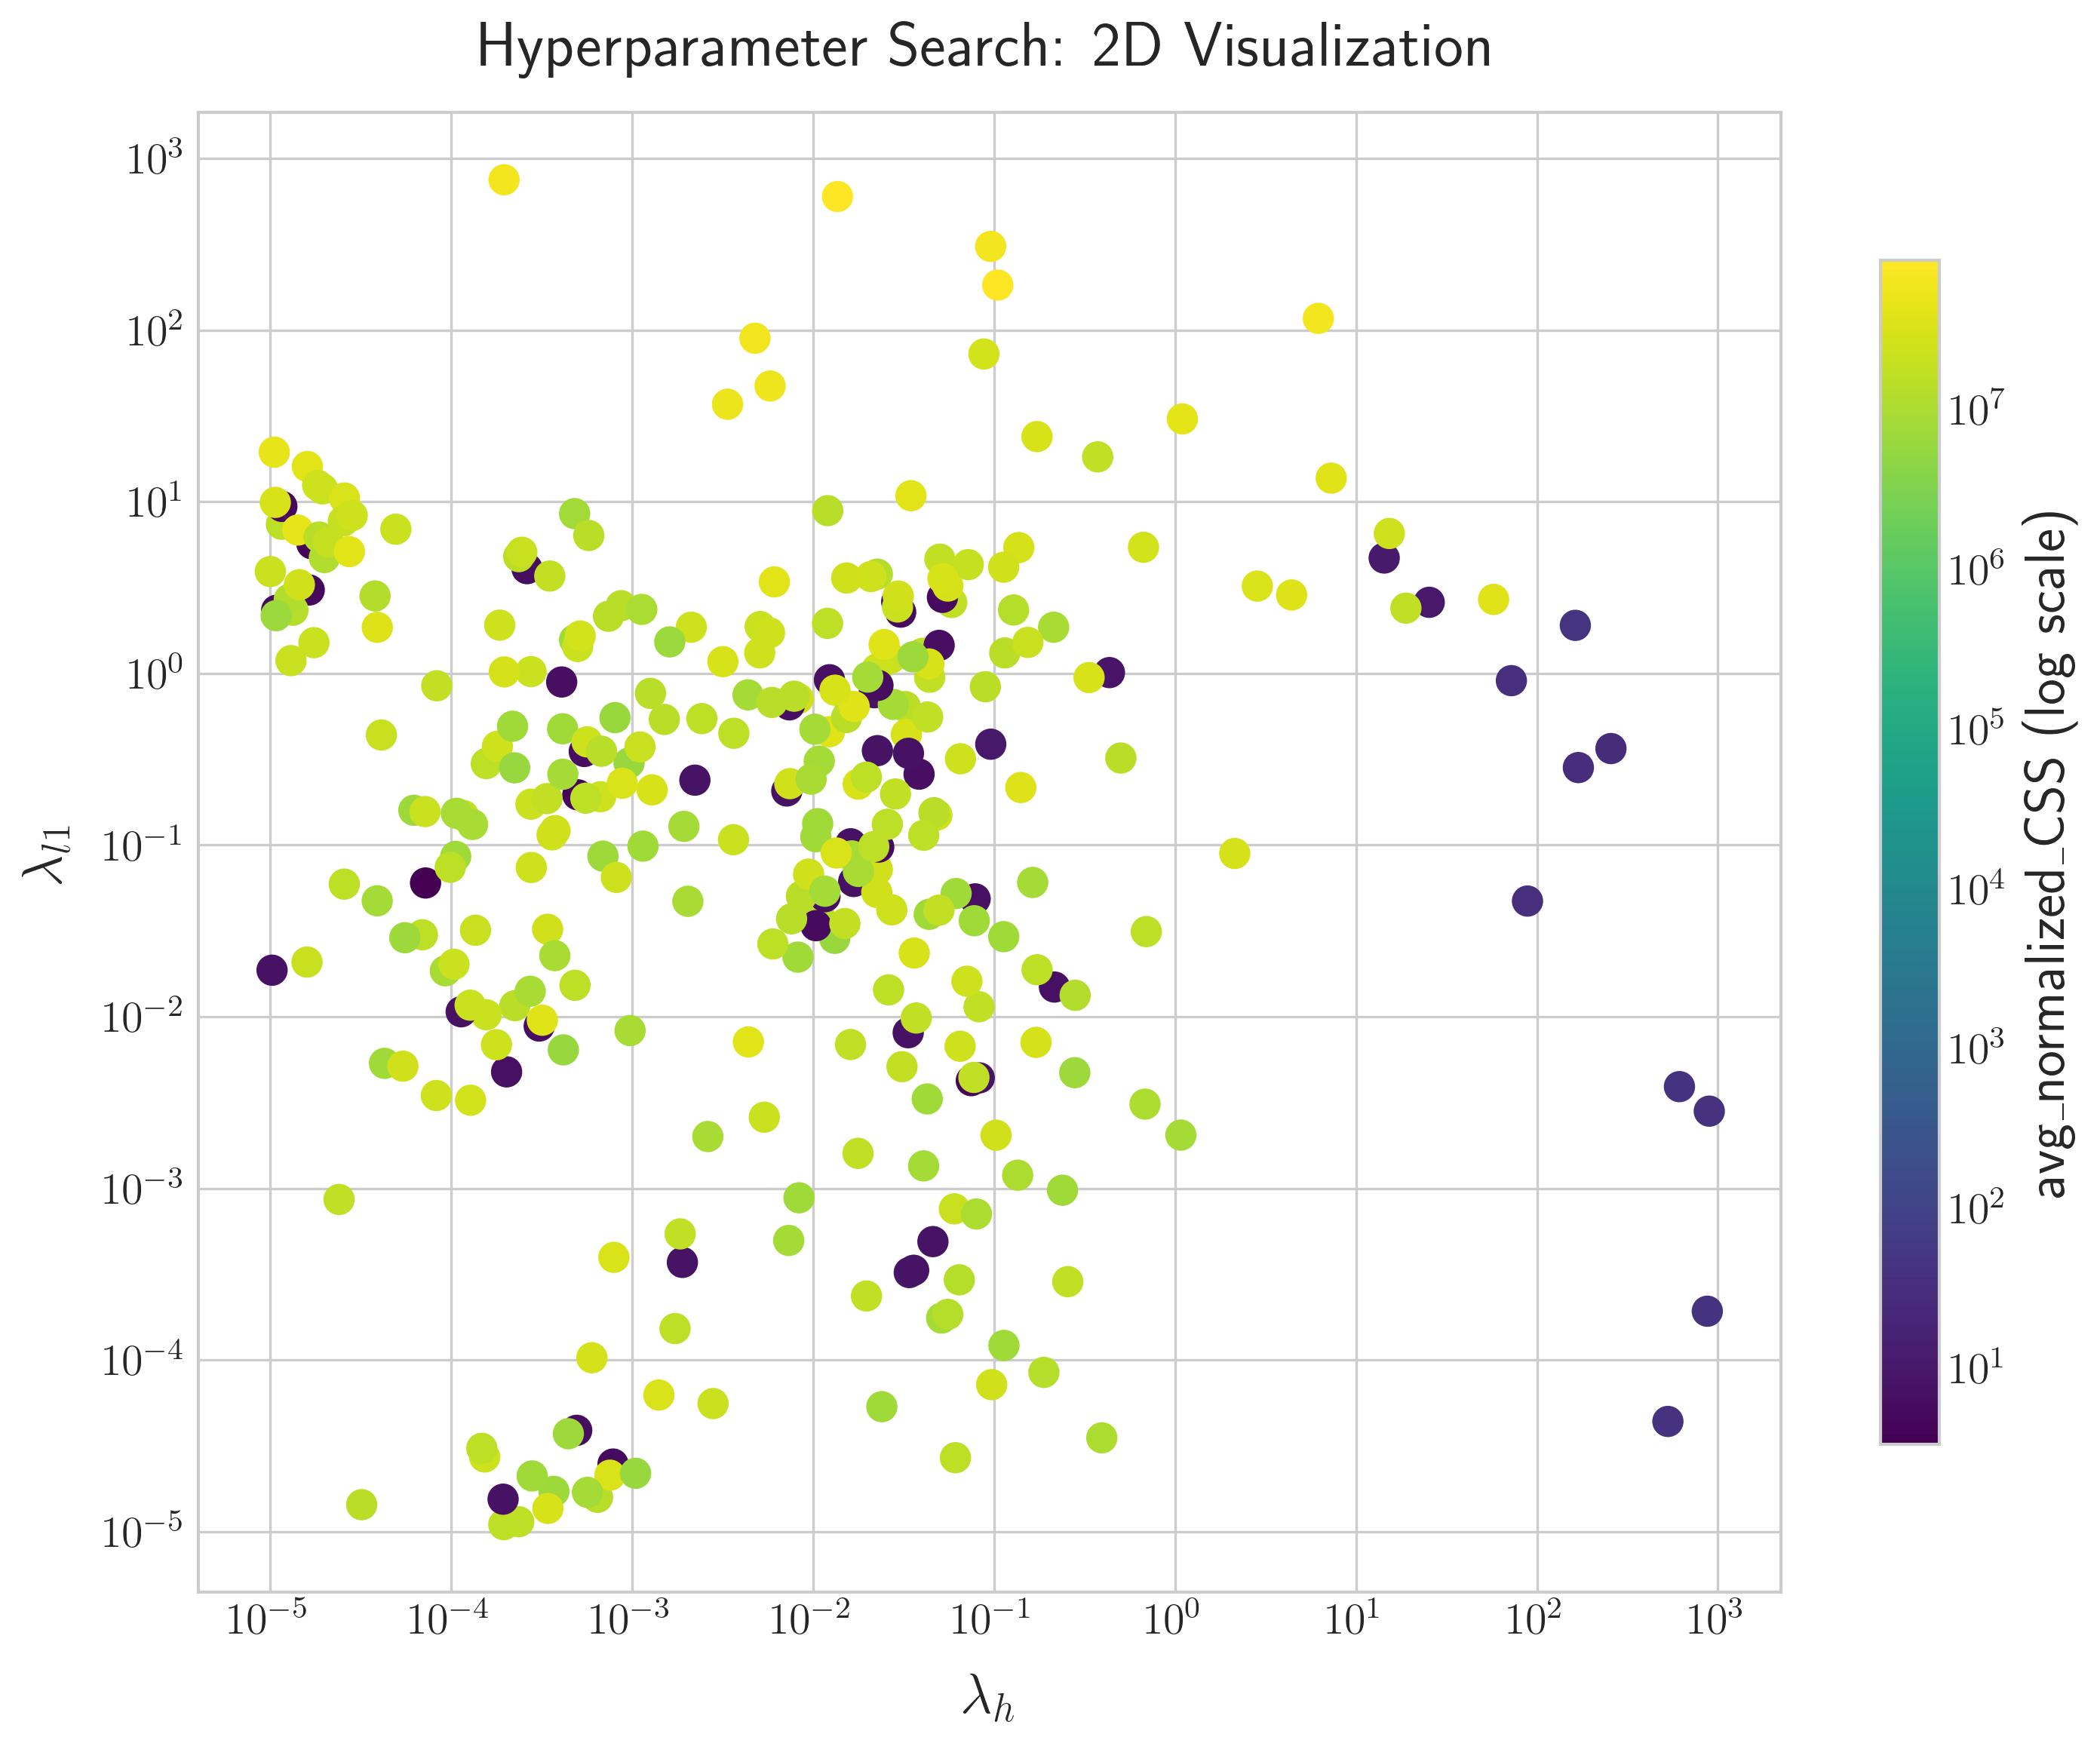

In [22]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Use a clean, publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

# Path to your .txt file (update as needed)
file_path = "hsearch_cyclic_intermediate_best.txt"

# Lists to hold extracted values.
lam_h_vals = []
lam_l1_vals = []
avg_css_vals = []

# Regular expression to extract lam_h, lam_l1, and avg_normalized_CSS.
pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalized_CSS=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_css_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check the file format and regex.")

# Convert to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
css = np.array(avg_css_vals)

# Debug prints.
print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_css range:", css.min(), "to", css.max())

# Create a 2D scatter plot.
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with color mapping using log normalization.
sc = ax.scatter(lam_h, lam_l1, c=css, cmap='viridis', s=80, norm=LogNorm())

# Set x and y axes to log scale.
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\lambda_h$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$\lambda_{l1}$", fontsize=18, labelpad=10)
ax.set_title("Hyperparameter Search: 2D Visualization", fontsize=20, pad=15)

# Add a colorbar with a label.
cbar = fig.colorbar(sc, ax=ax, shrink=0.8)
cbar.set_label(r"avg\_normalized\_CSS (log scale)", fontsize=18)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()


Extracted 325 data points.
lam_h range: 1.00097191235676e-05 to 895.71453521278
lam_l1 range: 1.0995963700215668e-05 to 751.6677625538456
avg_css range: 3.350931490156088 to 85520853.92911924


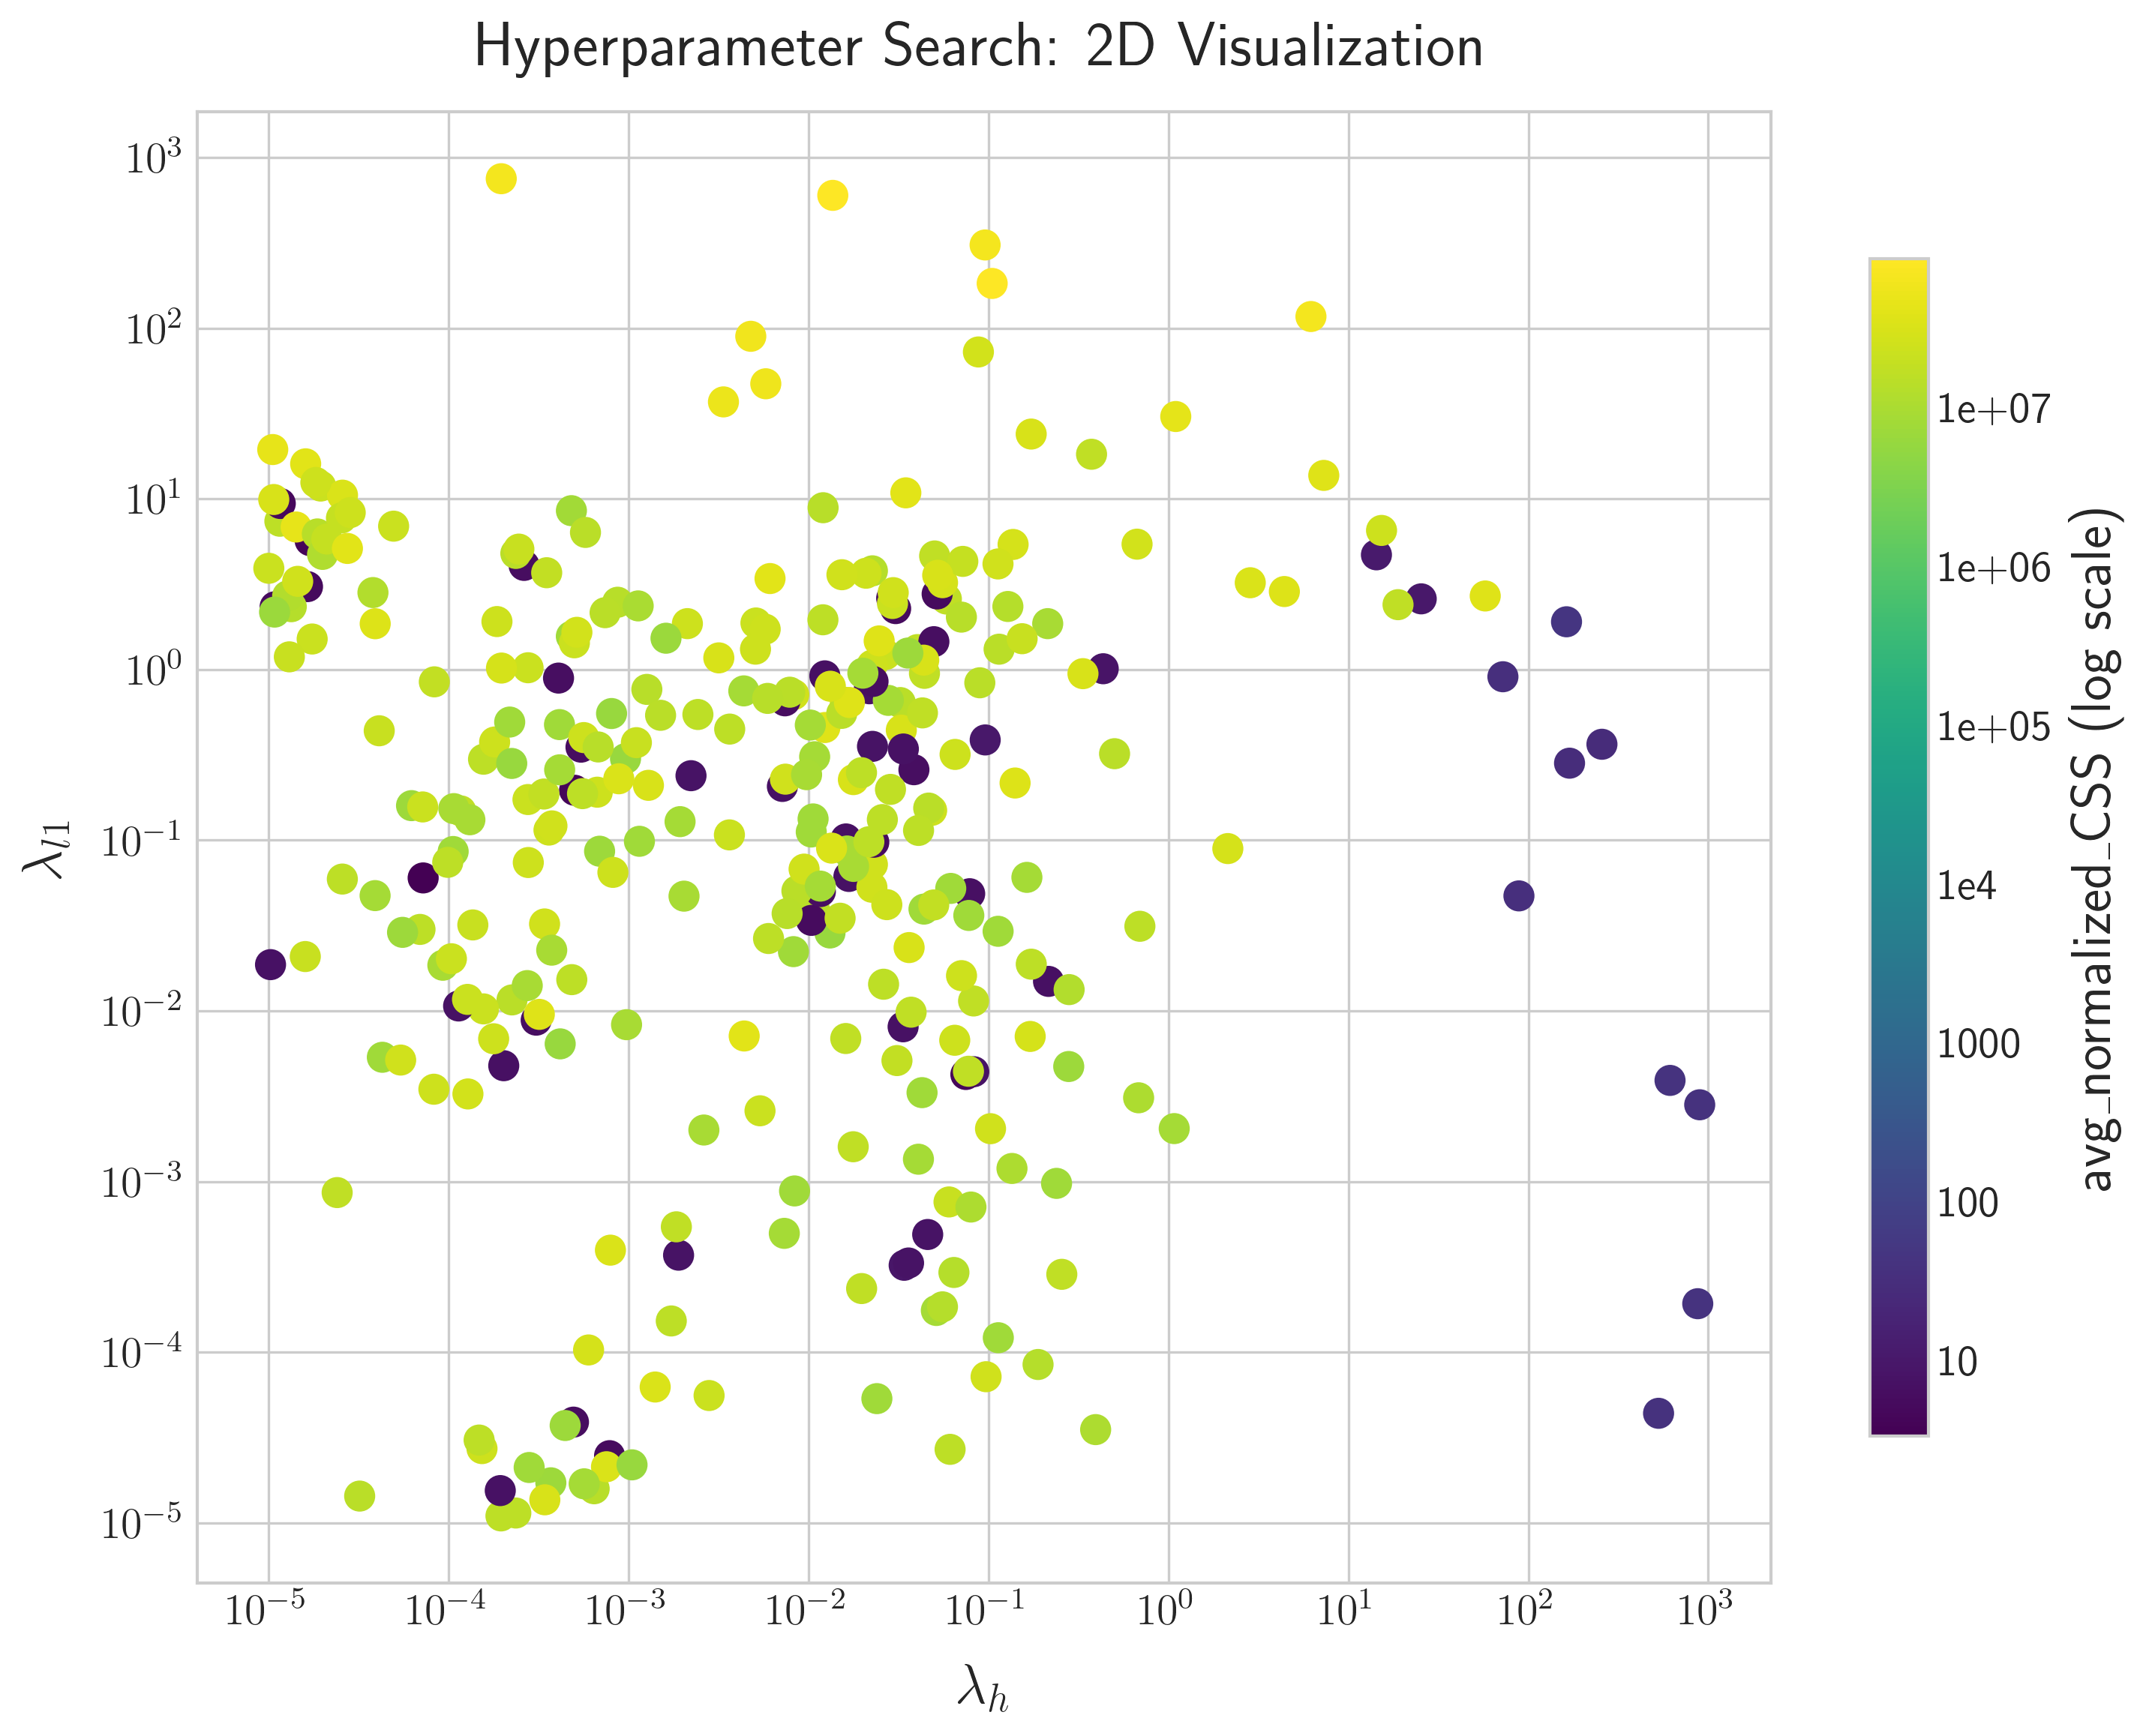

In [24]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator, LogFormatter

# Use a publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

# Update the file path as needed.
file_path = "hsearch_cyclic_intermediate_best.txt"

# Lists to hold extracted values.
lam_h_vals = []
lam_l1_vals = []
avg_css_vals = []

# Regular expression to extract lam_h, lam_l1, and avg_normalized_CSS.
pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalized_CSS=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_css_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check the file format and regex.")

# Convert lists to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
css = np.array(avg_css_vals)

print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_css range:", css.min(), "to", css.max())

# Create a 2D scatter plot.
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with log-normalized colors.
sc = ax.scatter(lam_h, lam_l1, c=css, cmap='viridis', s=80, norm=LogNorm())

# Set x and y axes to log scale.
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\lambda_h$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$\lambda_{l1}$", fontsize=18, labelpad=10)
ax.set_title("Hyperparameter Search: 2D Visualization", fontsize=20, pad=15)

# Create a colorbar that reflects the log normalization.
cbar = fig.colorbar(sc, ax=ax, shrink=0.8)
cbar.set_label(r"avg\_normalized\_CSS (log scale)", fontsize=18)
cbar.ax.tick_params(labelsize=14)
cbar.locator = LogLocator()     # Use a log locator for ticks.
cbar.formatter = LogFormatter()   # Use a log formatter for tick labels.
cbar.update_ticks()

plt.tight_layout()
plt.show()


# MIXED

Extracted 1338 data points.
lam_h range: 1.0347193318364435e-05 to 95440.15169436776
lam_l1 range: 1.0687319549878526e-05 to 99902.9763056494
avg_shd range: 0.33091269841269844 to 1.6652513227513228


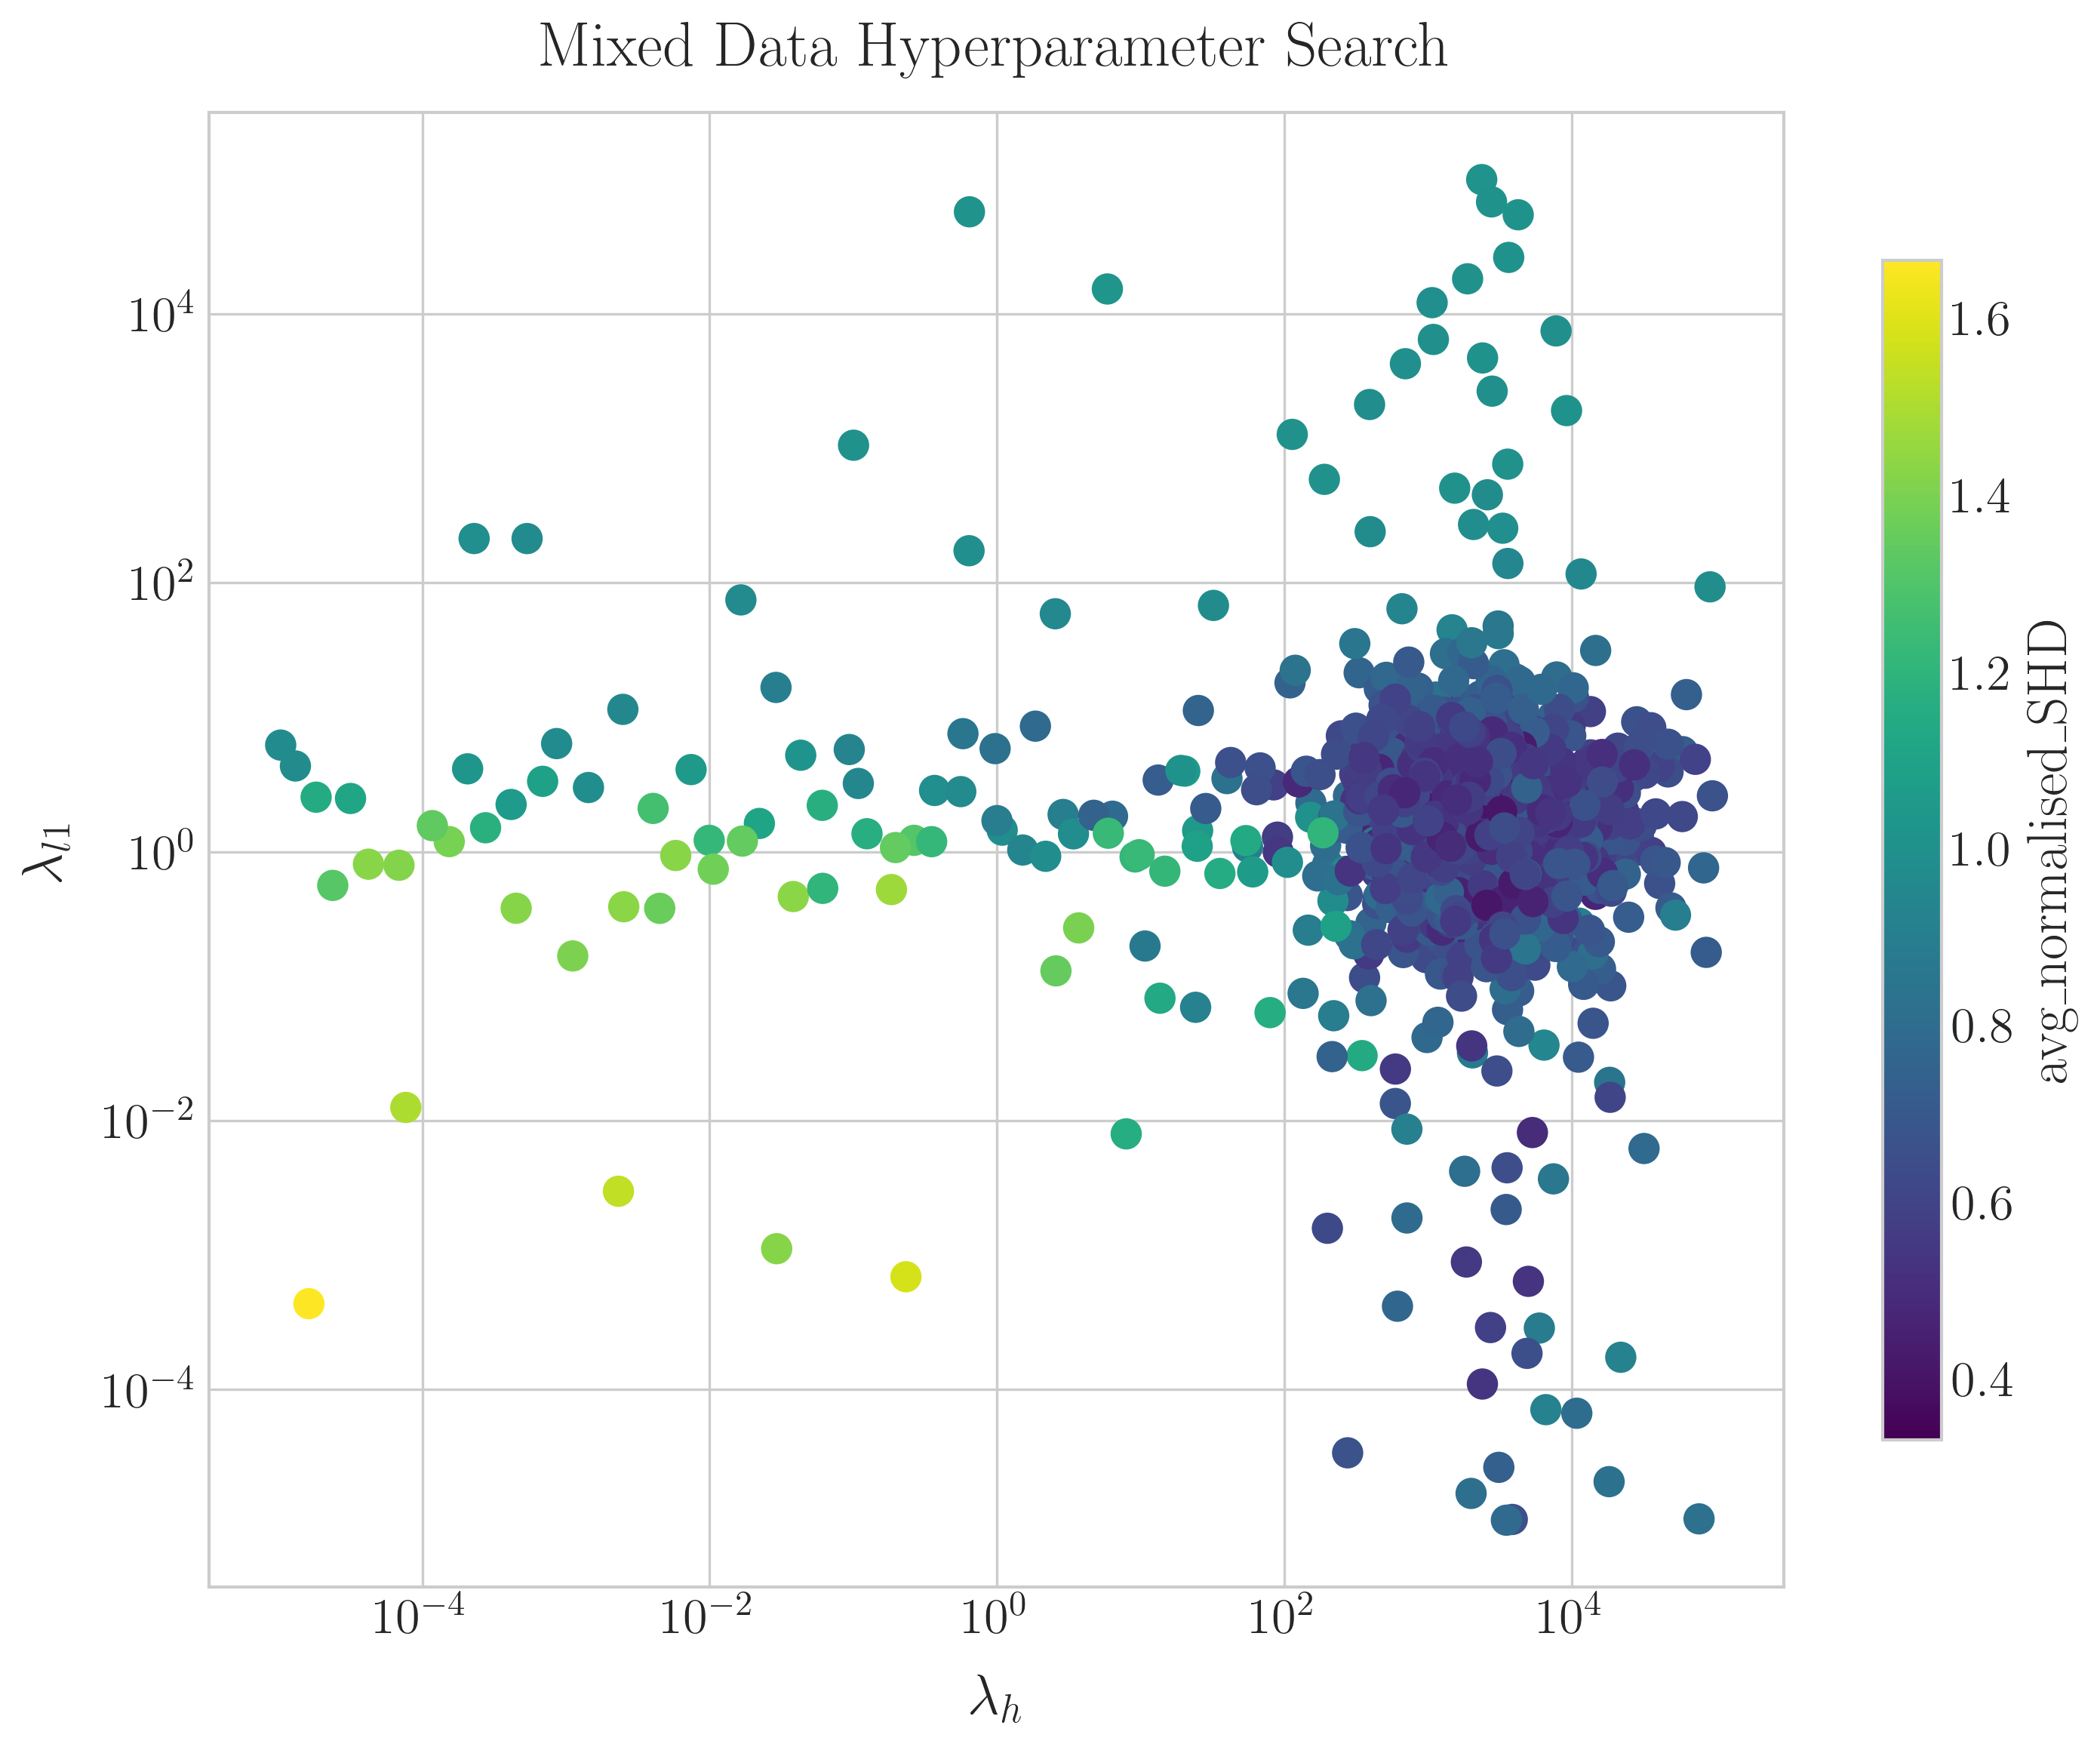

In [26]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Not used now

# Use a publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

# File path for mixed data.
file_path = "hsearch_mixed_intermediate_best.txt"

# Lists to hold extracted values.
lam_h_vals = []
lam_l1_vals = []
avg_shd_vals = []

# Regular expression to extract lam_h, lam_l1, and avg_normalised_SHD.
pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalised_SHD=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_shd_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check file format or regex.")

# Convert lists to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
shd = np.array(avg_shd_vals)

print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_shd range:", shd.min(), "to", shd.max())

# Publication-quality settings.
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

fig, ax = plt.subplots(figsize=(10, 8))

# Create a 2D scatter plot.
# Note: We use a linear norm here, so the color mapping remains on the original scale.
sc = ax.scatter(lam_h, lam_l1, c=shd, cmap='viridis', s=80)

# Set the x- and y-axes to log scale.
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\lambda_h$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$\lambda_{l1}$", fontsize=18, labelpad=10)
ax.set_title("Mixed Data Hyperparameter Search", fontsize=20, pad=15)

# Create a colorbar without log normalization (z remains in normal scale).
cbar = fig.colorbar(sc, ax=ax, shrink=0.8)
cbar.set_label(r"avg\_normalised\_SHD", fontsize=18)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.show()


Extracted 1343 data points.
lam_h range: 1.0347193318364435e-05 to 95440.15169436776
lam_l1 range: 1.0687319549878526e-05 to 99902.9763056494
avg_shd range: 0.33091269841269844 to 1.6652513227513228
Subsampled to 219 points.


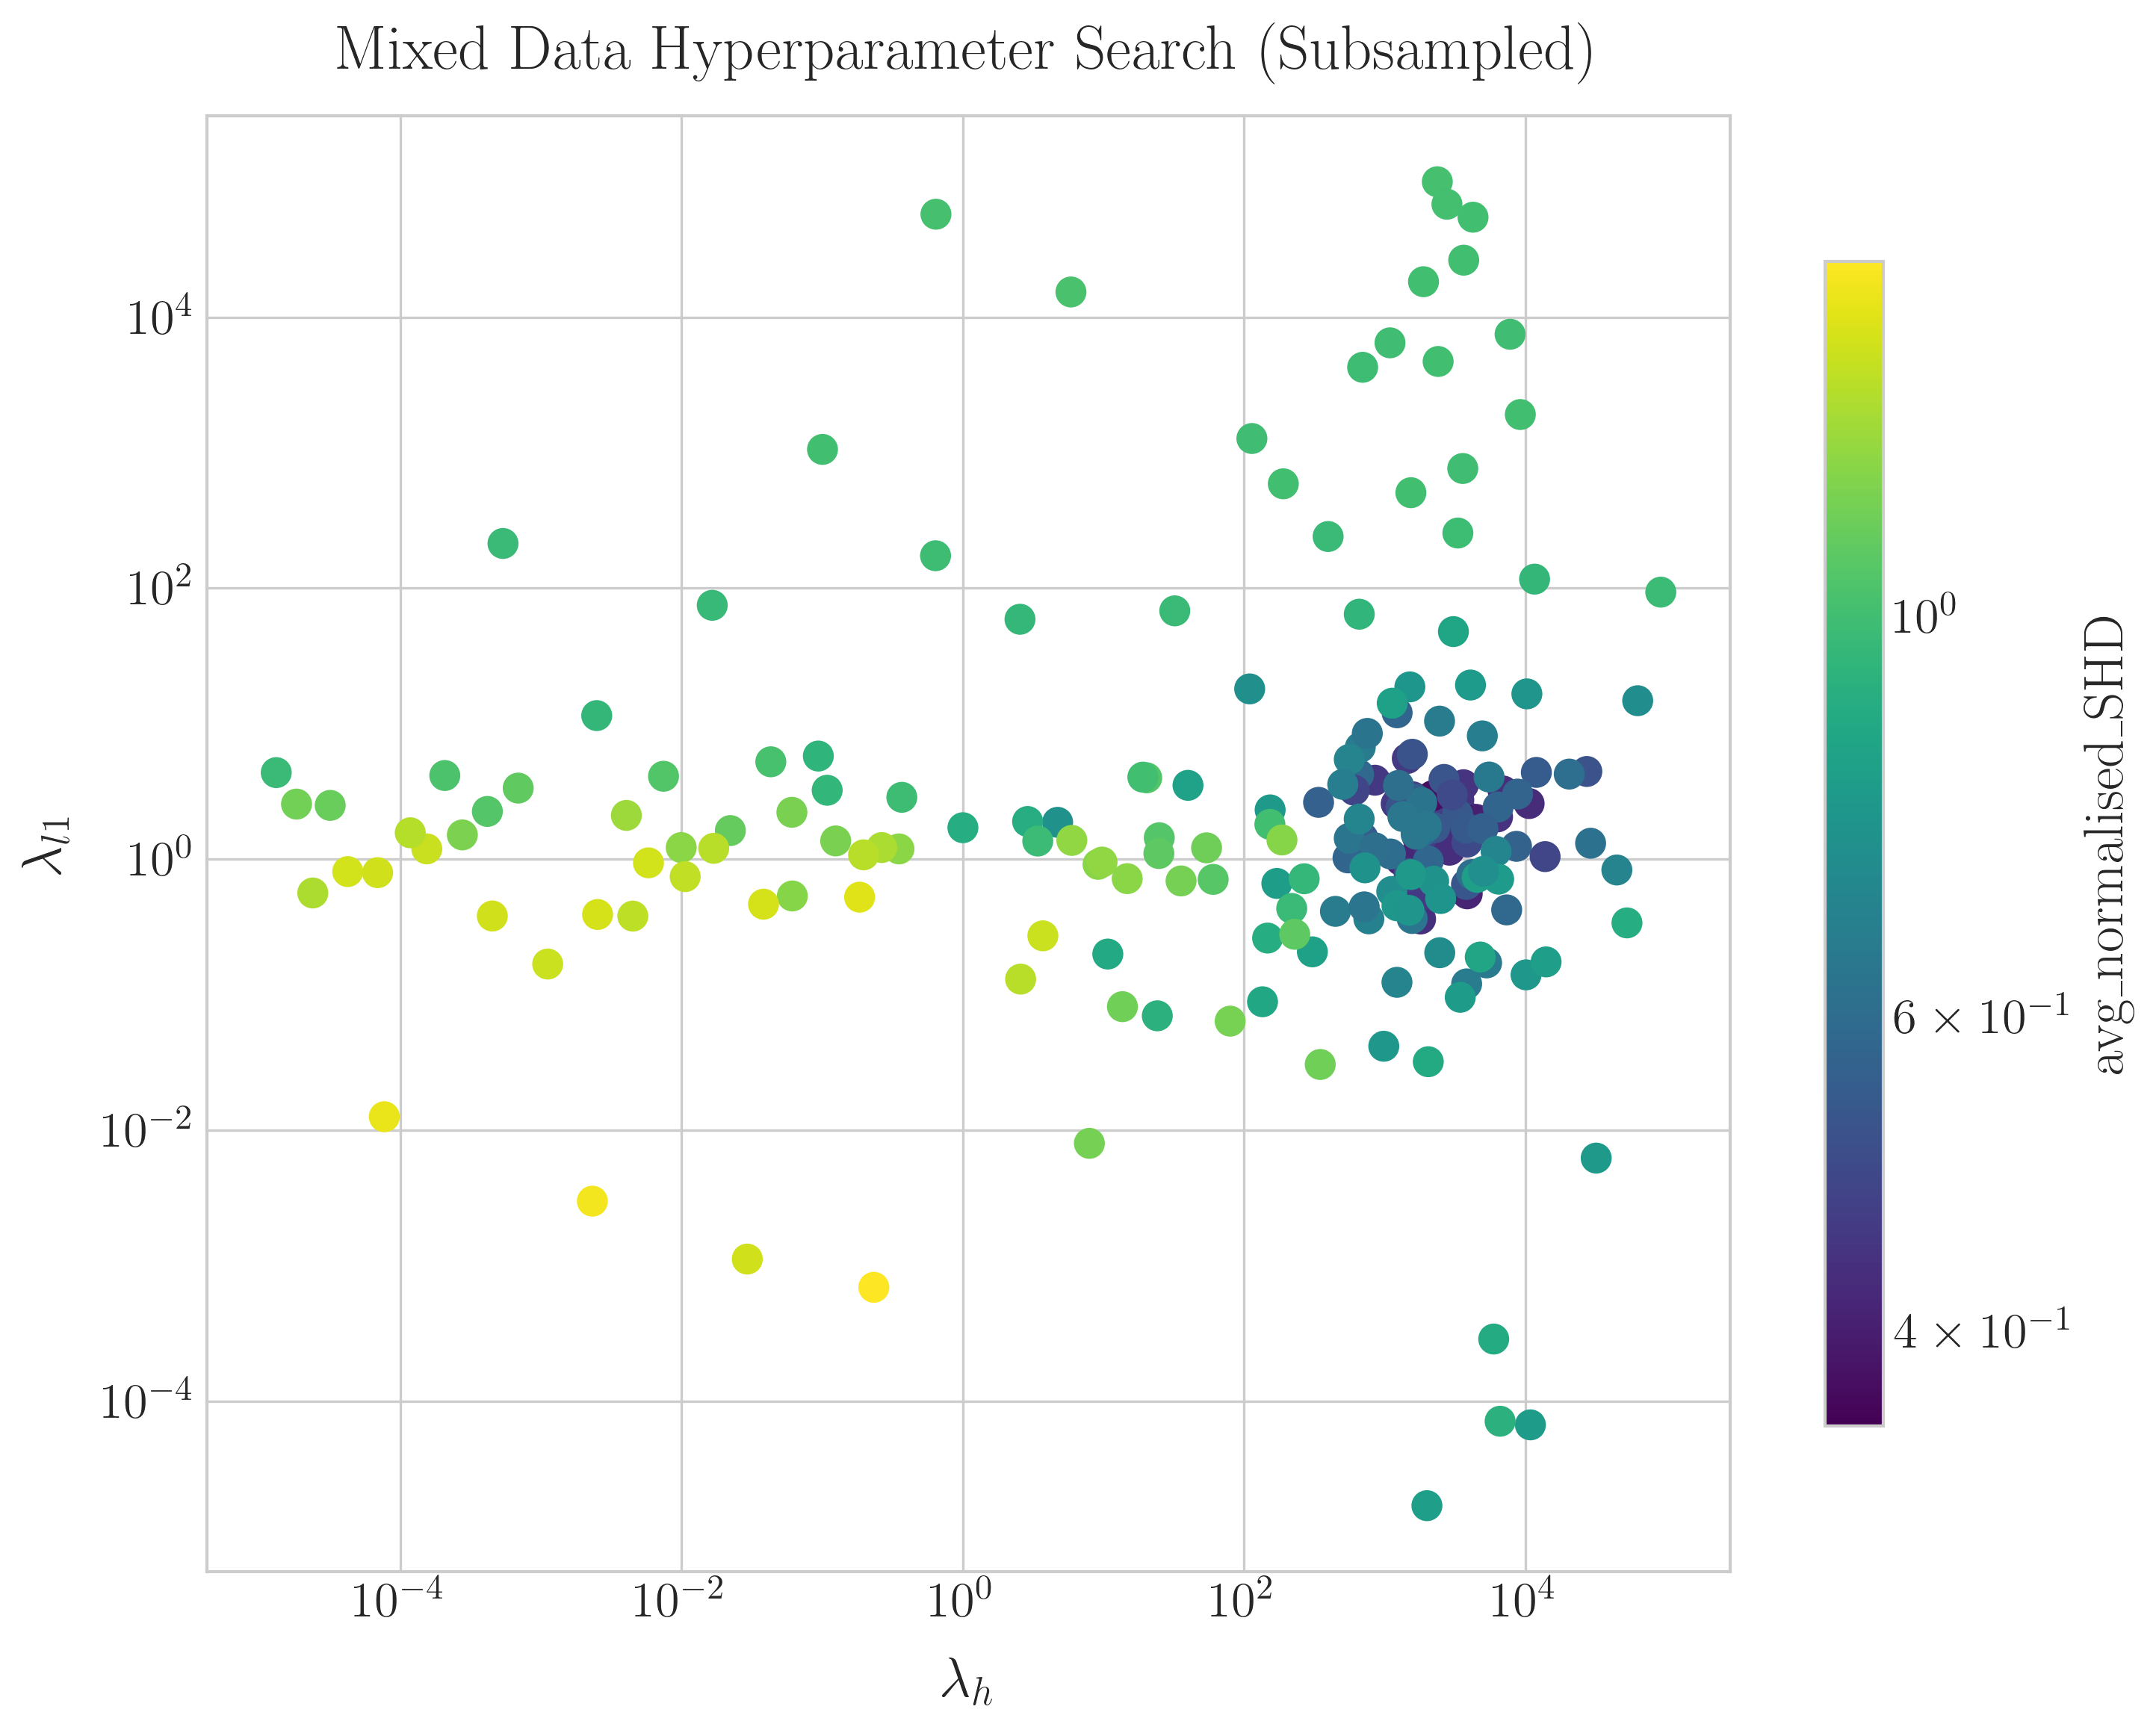

In [34]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter

# Use a publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

file_path = "hsearch_mixed_intermediate_best.txt"

# Lists to hold extracted values.
lam_h_vals = []
lam_l1_vals = []
avg_shd_vals = []

# Regular expression to extract lam_h, lam_l1, and avg_normalised_SHD.
pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalised_SHD=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_shd_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check file format or regex.")

# Convert lists to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
shd = np.array(avg_shd_vals)

print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_shd range:", shd.min(), "to", shd.max())

# Safety: Filter out non-positive values.
mask = (lam_h > 0) & (lam_l1 > 0) & (shd > 0)
lam_h = lam_h[mask]
lam_l1 = lam_l1[mask]
shd = shd[mask]

# --- Subsample Data ---
# Create 10 bins between min and max avg_shd.
bins = np.linspace(shd.min(), shd.max(), 11)  # 11 edges for 10 bins
digitized = np.digitize(shd, bins, right=False)

# For reproducibility, you can set a random seed if desired:
np.random.seed(42)

selected_indices = []
for b in range(1, len(bins)):  # bins are labeled 1 to 10
    inds = np.where(digitized == b)[0]
    if len(inds) > 30:
        selected = np.random.choice(inds, size=30, replace=False)
    else:
        selected = inds
    selected_indices.extend(selected)

# Subsample the arrays.
lam_h_sub = lam_h[selected_indices]
lam_l1_sub = lam_l1[selected_indices]
shd_sub = shd[selected_indices]

print("Subsampled to", len(lam_h_sub), "points.")

# --- Plotting ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

fig, ax = plt.subplots(figsize=(10, 8))

# Create 2D scatter plot.
sc = ax.scatter(lam_h_sub, lam_l1_sub, c=shd_sub, cmap='viridis', s=80, norm=LogNorm())

# Set x and y axes to log scale.
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\lambda_h$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$\lambda_{l1}$", fontsize=18, labelpad=10)
ax.set_title("Mixed Data Hyperparameter Search (Subsampled)", fontsize=20, pad=15)

# Create colorbar (linear for SHD).
cbar = fig.colorbar(sc, ax=ax, shrink=0.8)
cbar.set_label(r"avg\_normalised\_SHD", fontsize=18)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.show()


Extracted 1346 data points.
lam_h range: 1.0347193318364435e-05 to 95440.15169436776
lam_l1 range: 1.0687319549878526e-05 to 99902.9763056494
avg_shd range: 0.33091269841269844 to 1.6652513227513228
Subsampled to 161 points.


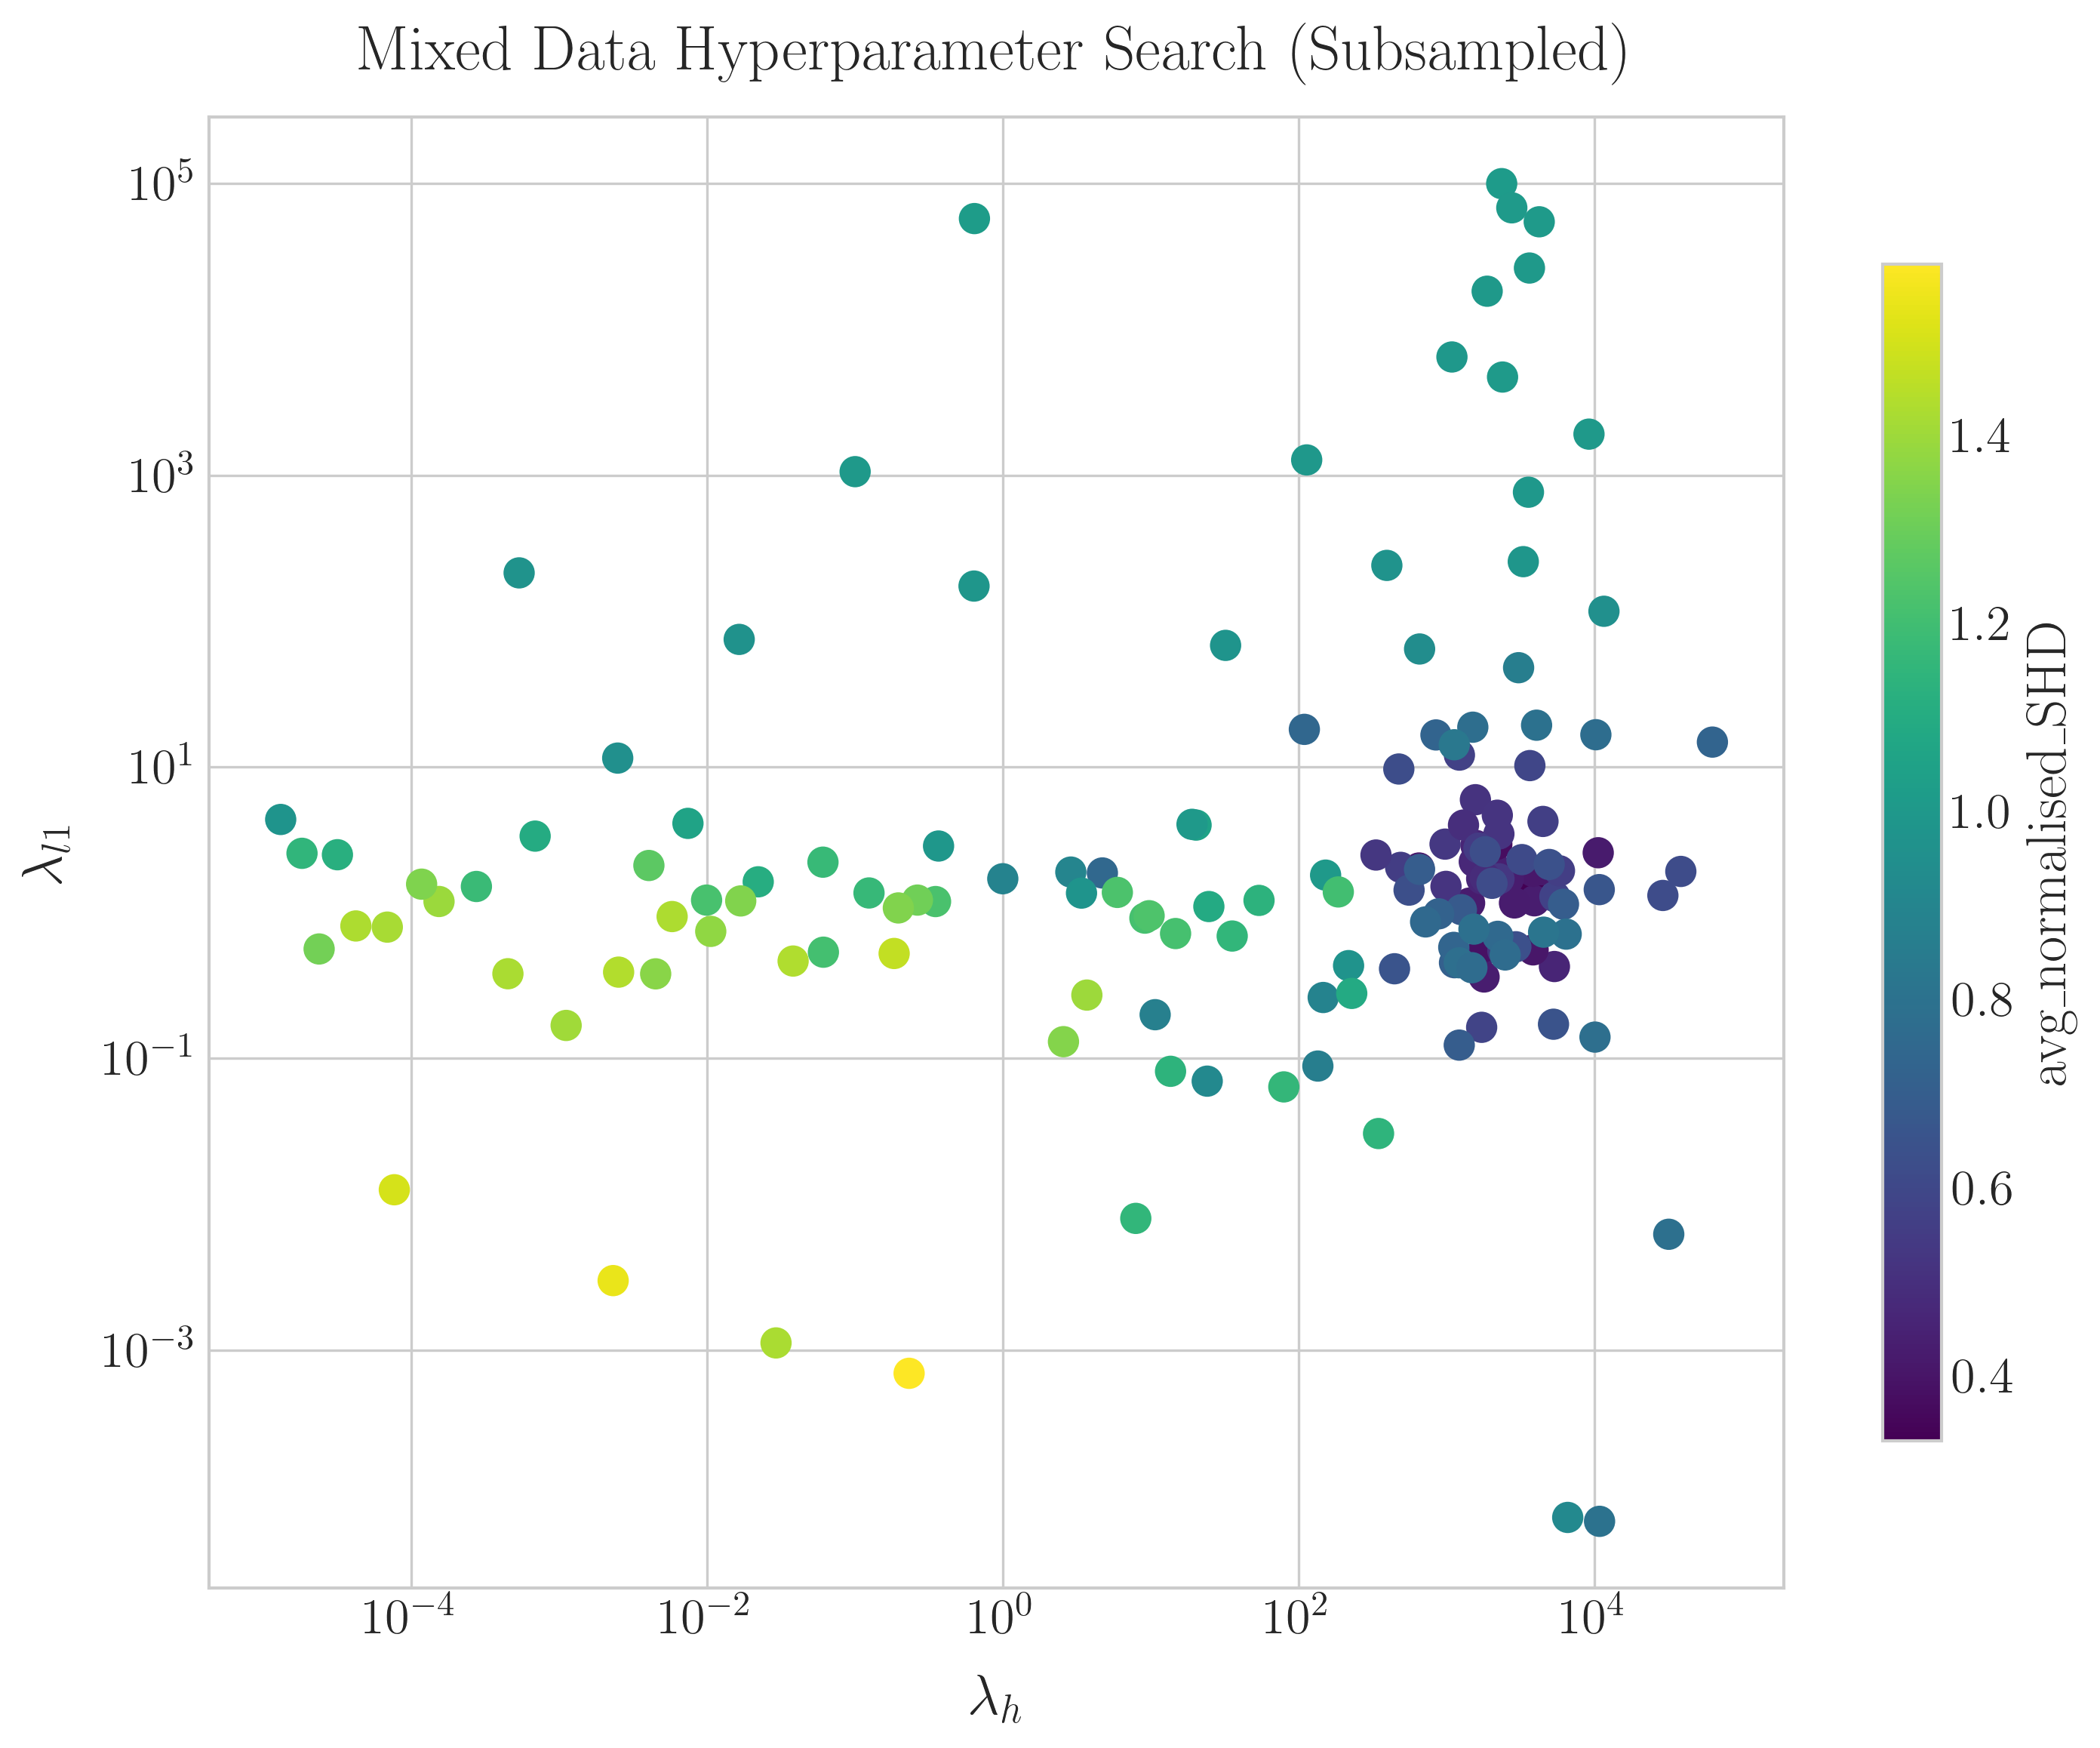

In [42]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter, ScalarFormatter

# Use a publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

file_path = "hsearch_mixed_intermediate_best.txt"

# Lists to hold extracted values.
lam_h_vals = []
lam_l1_vals = []
avg_shd_vals = []

# Regular expression to extract lam_h, lam_l1, and avg_normalised_SHD.
pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalised_SHD=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_shd_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check file format or regex.")

# Convert lists to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
shd = np.array(avg_shd_vals)

print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_shd range:", shd.min(), "to", shd.max())

# Safety: Filter out non-positive values.
mask = (lam_h > 0) & (lam_l1 > 0) & (shd > 0)
lam_h = lam_h[mask]
lam_l1 = lam_l1[mask]
shd = shd[mask]

# --- Subsample Data ---
# Create 10 bins between the minimum and maximum of avg_shd.
bins = np.linspace(shd.min(), shd.max(), 11)  # 11 edges for 10 bins
digitized = np.digitize(shd, bins, right=False)

# Set random seed for reproducibility.
np.random.seed(42)

selected_indices = []
for b in range(1, len(bins)):  # bins are labeled 1 to 10
    inds = np.where(digitized == b)[0]
    if len(inds) > 20:
        selected = np.random.choice(inds, size=20, replace=False)
    else:
        selected = inds
    selected_indices.extend(selected)

# Subsample the arrays.
lam_h_sub = lam_h[selected_indices]
lam_l1_sub = lam_l1[selected_indices]
shd_sub = shd[selected_indices]

print("Subsampled to", len(lam_h_sub), "points.")

# --- Plotting ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

fig, ax = plt.subplots(figsize=(10, 8))

# Create a 2D scatter plot.
sc = ax.scatter(lam_h_sub, lam_l1_sub, c=shd_sub, cmap='viridis', s=80)

# Set x and y axes to log scale.
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\lambda_h$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$\lambda_{l1}$", fontsize=18, labelpad=10)
ax.set_title("Mixed Data Hyperparameter Search (Subsampled)", fontsize=20, pad=15)

# Create a colorbar.
cbar = fig.colorbar(sc, ax=ax, shrink=0.8)
cbar.set_label(r"avg\_normalised\_SHD", fontsize=18)
cbar.ax.tick_params(labelsize=16)

# Use a FuncFormatter to force decimal formatting (e.g., 0.1, 0.5, 1.0).
cbar.formatter = FuncFormatter(lambda x, pos: f"{x:.1f}")
cbar.update_ticks()

plt.tight_layout()
plt.show()


Extracted 1346 data points.
lam_h range: 1.0347193318364435e-05 to 95440.15169436776
lam_l1 range: 1.0687319549878526e-05 to 99902.9763056494
avg_shd range: 0.33091269841269844 to 1.6652513227513228
Subsampled to 161 points.


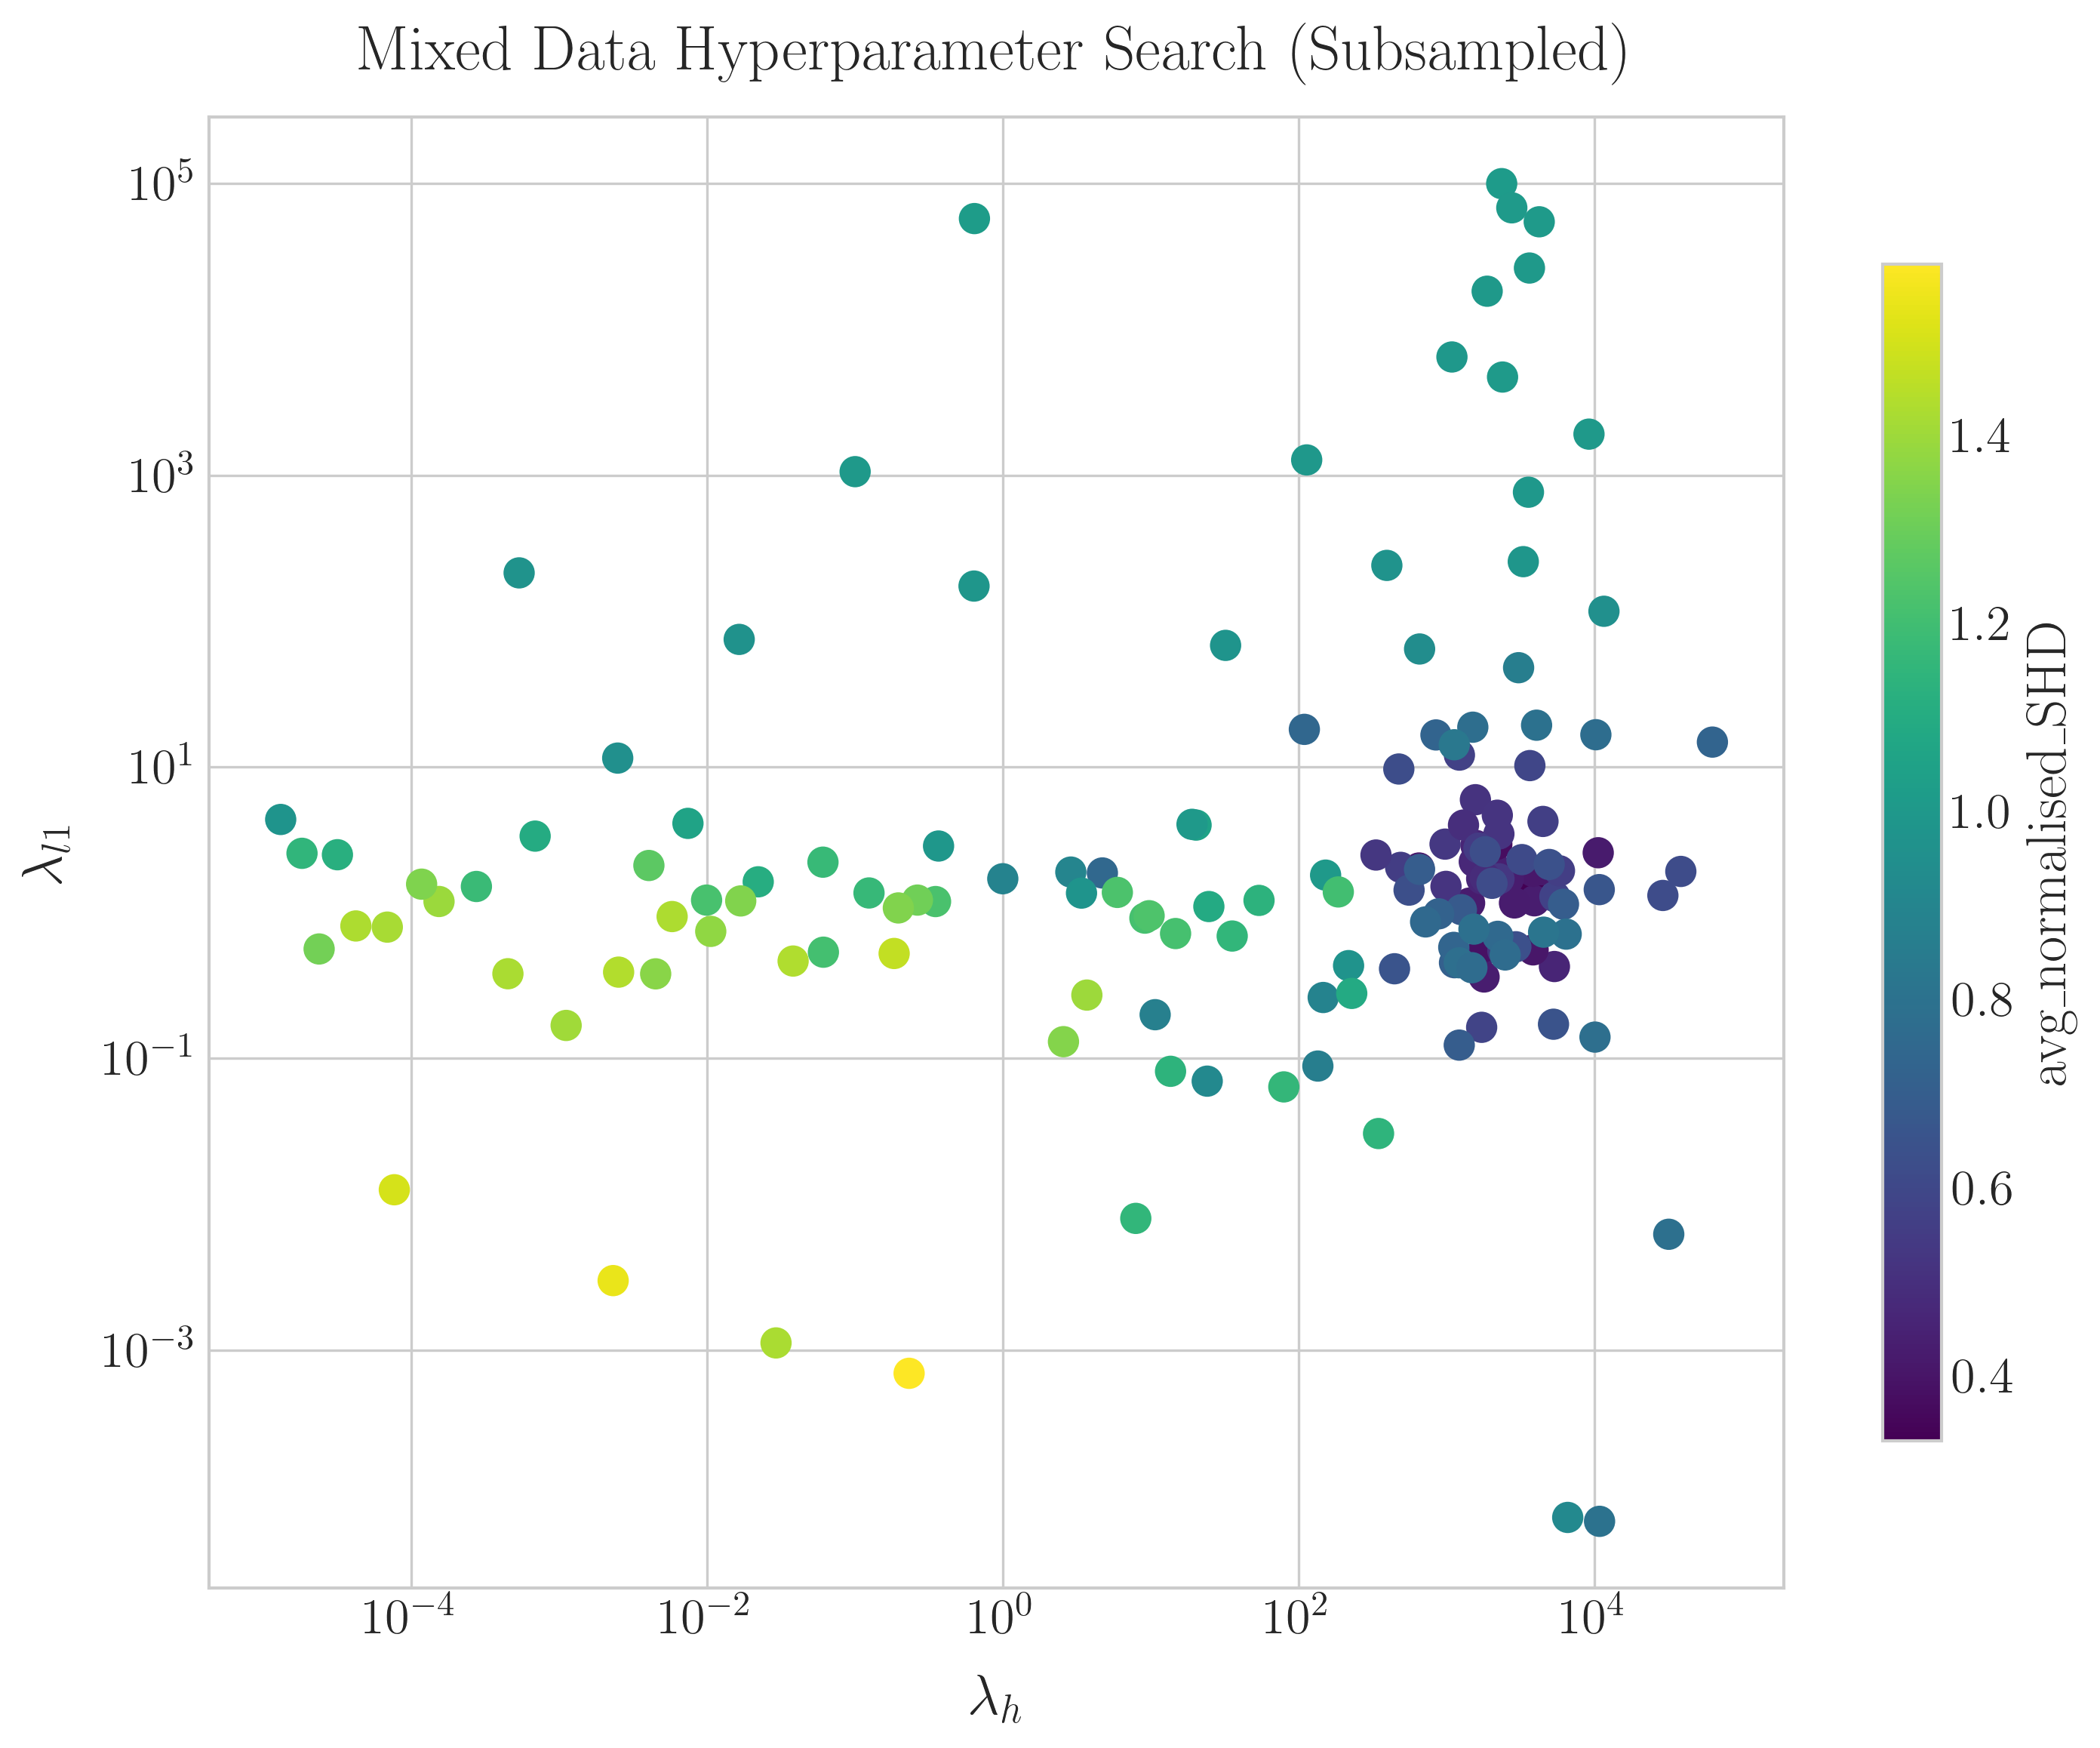

In [44]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Not used now
# from matplotlib.ticker import ScalarFormatter  # Not needed

# Use a publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

file_path = "hsearch_mixed_intermediate_best.txt"

# Lists to hold extracted values.
lam_h_vals = []
lam_l1_vals = []
avg_shd_vals = []

# Regular expression to extract lam_h, lam_l1, and avg_normalised_SHD.
pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalised_SHD=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_shd_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check file format or regex.")

# Convert lists to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
shd = np.array(avg_shd_vals)

print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_shd range:", shd.min(), "to", shd.max())

# Safety: Filter out non-positive values.
mask = (lam_h > 0) & (lam_l1 > 0) & (shd > 0)
lam_h = lam_h[mask]
lam_l1 = lam_l1[mask]
shd = shd[mask]

# --- Subsample Data ---
# Create 10 bins between the minimum and maximum of avg_shd.
bins = np.linspace(shd.min(), shd.max(), 11)  # 11 edges for 10 bins
digitized = np.digitize(shd, bins, right=False)

# Set random seed for reproducibility.
np.random.seed(42)

selected_indices = []
for b in range(1, len(bins)):  # bins are labeled 1 to 10
    inds = np.where(digitized == b)[0]
    if len(inds) > 20:
        selected = np.random.choice(inds, size=20, replace=False)
    else:
        selected = inds
    selected_indices.extend(selected)

# Subsample the arrays.
lam_h_sub = lam_h[selected_indices]
lam_l1_sub = lam_l1[selected_indices]
shd_sub = shd[selected_indices]

print("Subsampled to", len(lam_h_sub), "points.")

# --- Plotting ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

fig, ax = plt.subplots(figsize=(10, 8))

# Use a linear color mapping (remove LogNorm).
sc = ax.scatter(lam_h_sub, lam_l1_sub, c=shd_sub, cmap='viridis', s=80)

# Set x and y axes to log scale (so tick labels are raw values).
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\lambda_h$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$\lambda_{l1}$", fontsize=18, labelpad=10)
ax.set_title("Mixed Data Hyperparameter Search (Subsampled)", fontsize=20, pad=15)

# Create a colorbar with the format specified to use decimals.
cbar = fig.colorbar(sc, ax=ax, shrink=0.8, format="%.1f")
cbar.set_label(r"avg\_normalised\_SHD", fontsize=18)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.show()


Extracted 1350 data points.
lam_h range: 1.0347193318364435e-05 to 95440.15169436776
lam_l1 range: 1.0687319549878526e-05 to 99902.9763056494
avg_shd range: 0.33091269841269844 to 1.6652513227513228


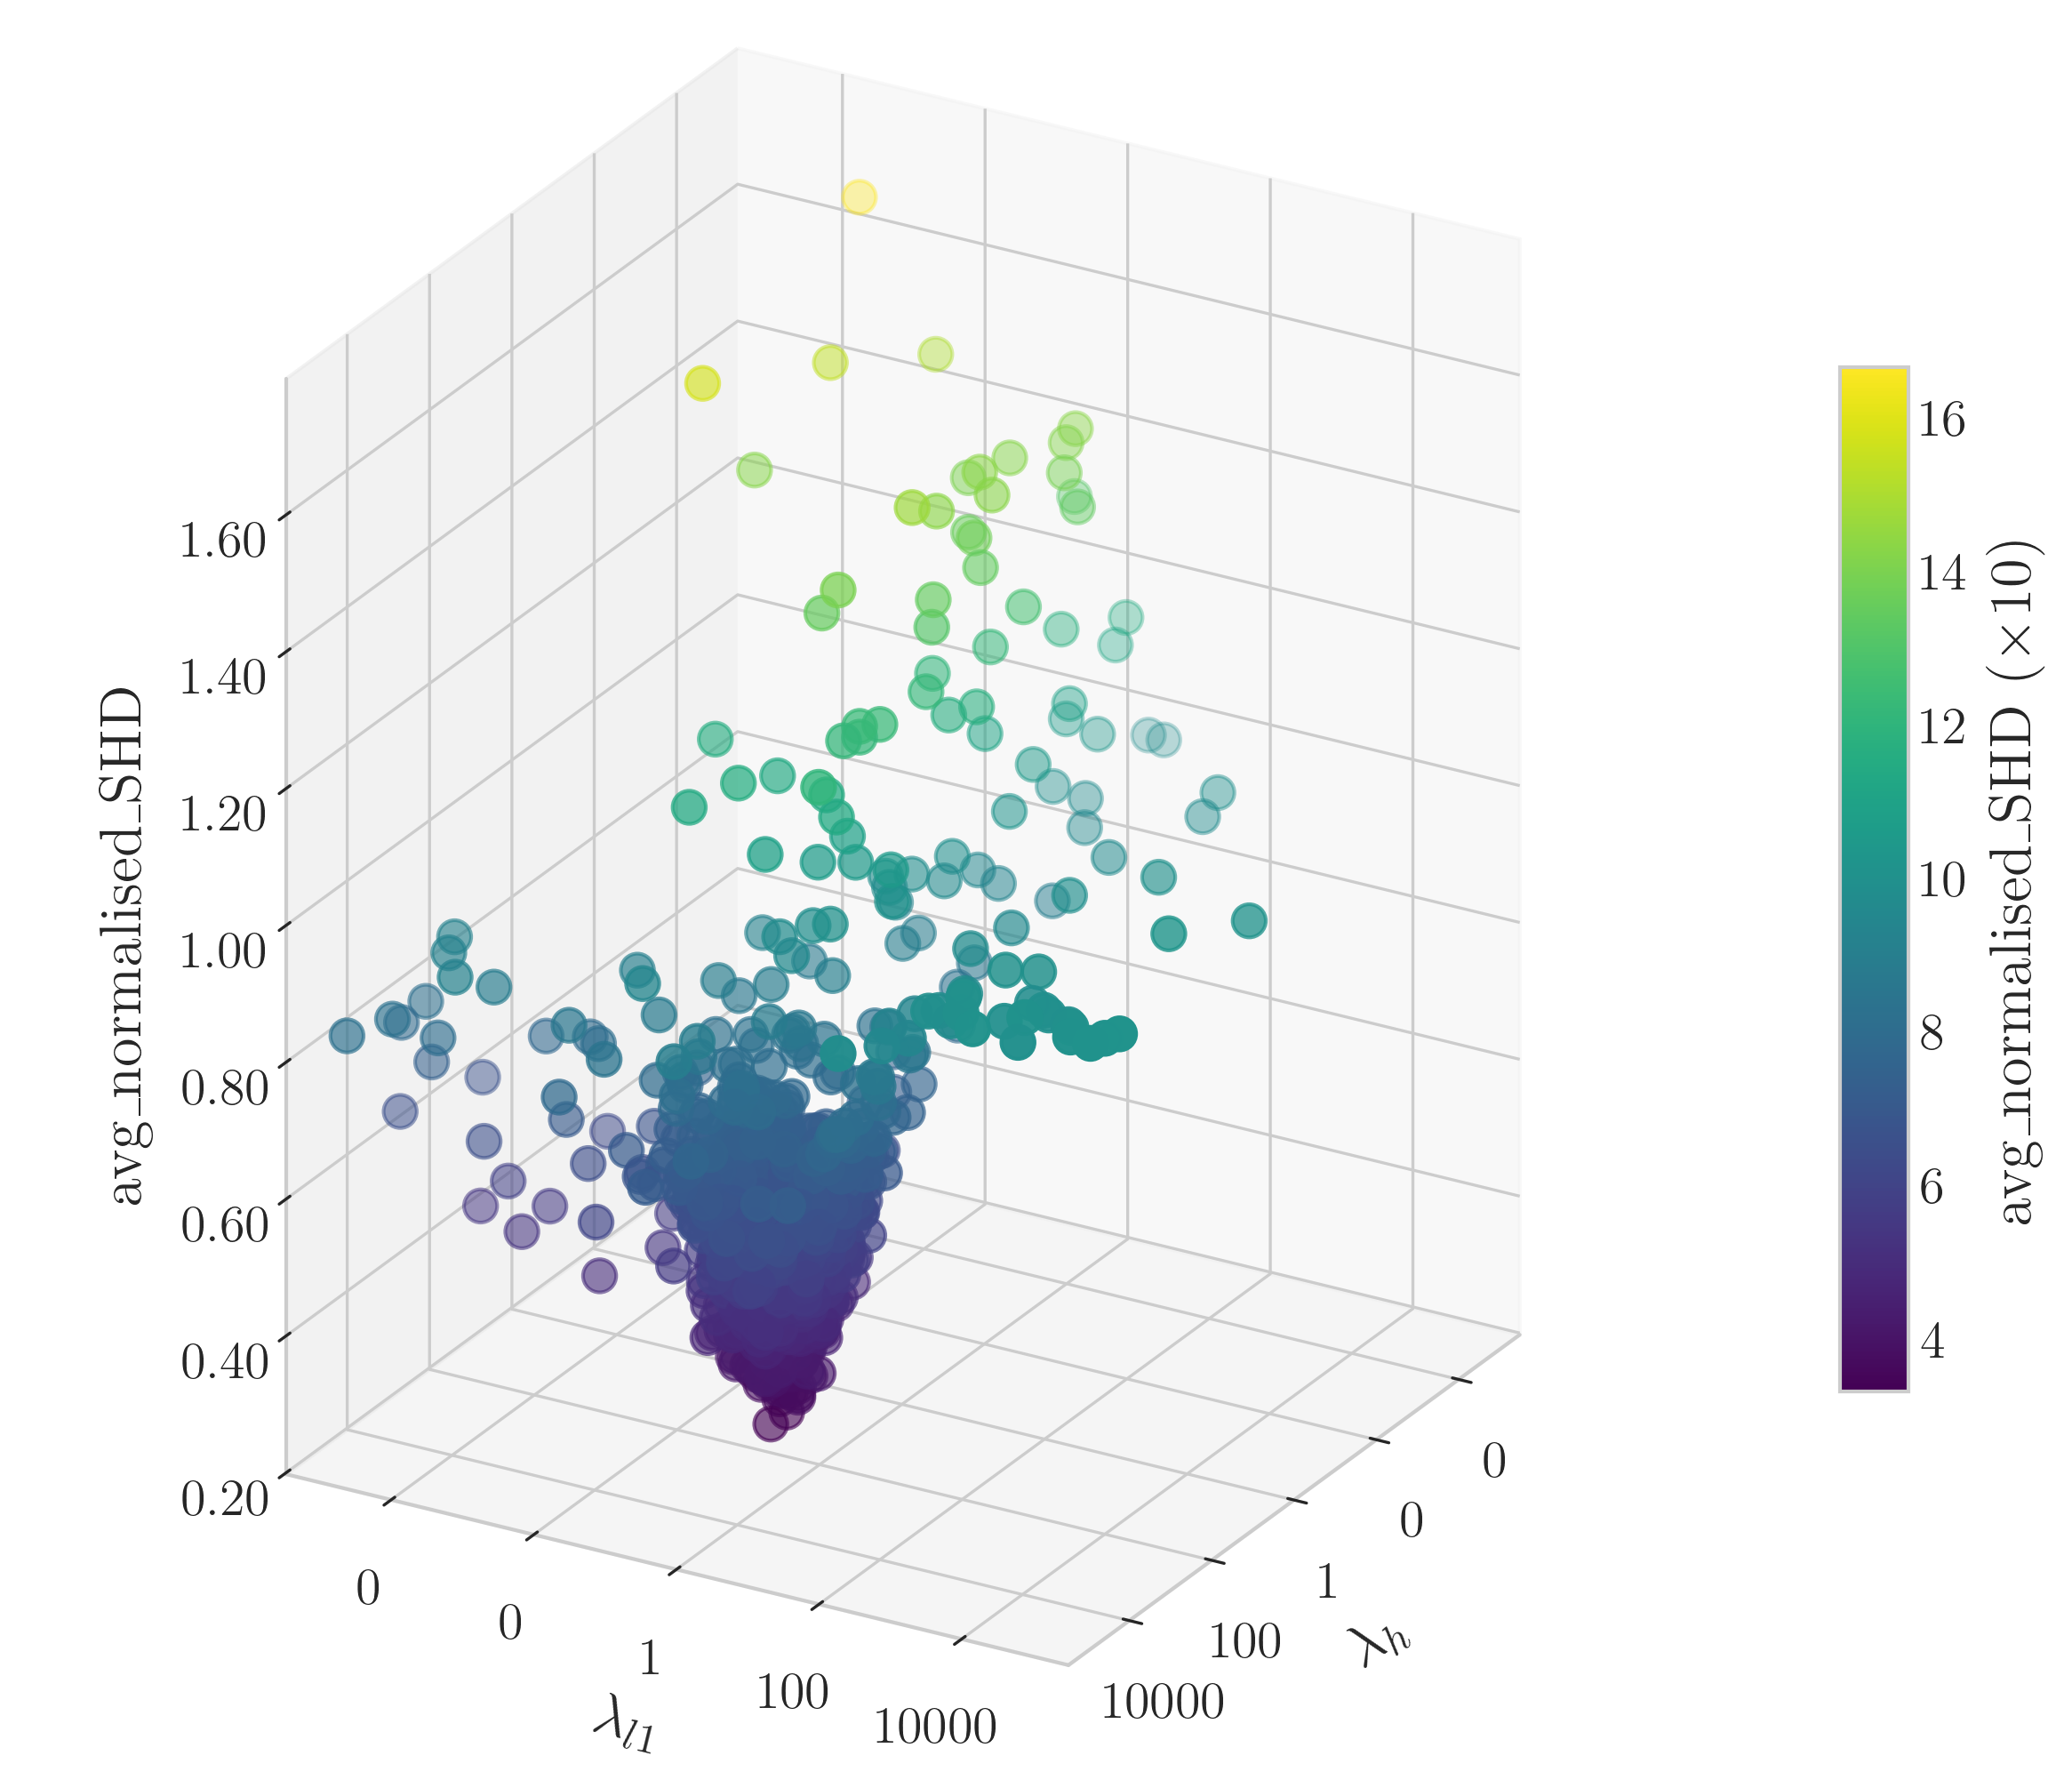

In [57]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from matplotlib.ticker import FuncFormatter

# Use a publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

file_path = "hsearch_mixed_intermediate_best.txt"

# Extract data from file.
lam_h_vals = []
lam_l1_vals = []
avg_shd_vals = []

pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalised_SHD=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_shd_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check file format or regex.")

# Convert lists to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
shd = np.array(avg_shd_vals)

print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_shd range:", shd.min(), "to", shd.max())

# Safety: Filter out non-positive values.
mask = (lam_h > 0) & (lam_l1 > 0) & (shd > 0)
lam_h = lam_h[mask]
lam_l1 = lam_l1[mask]
shd = shd[mask]

# Transform x and y: take log10 so that points are placed in log-space.
X = np.log10(lam_h)
Y = np.log10(lam_l1)

# Keep z raw but apply a vertical exaggeration.
exaggeration_factor = 10.0
Z_ex = shd * exaggeration_factor

# Publication-quality settings.
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "figure.dpi": 300,
})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the transformed data.
sc = ax.scatter(X, Y, Z_ex, c=Z_ex, cmap='viridis', marker='o', s=80)

# Instead of setting log scales on the axes, we already plot in log-space.
# Now, set custom tick formatters so that x and y tick labels show raw values.
def raw_formatter(val, pos):
    # val is log10(value); return the raw value formatted.
    return f"{10**val:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(raw_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(raw_formatter))

# For the z-axis, we want to show the raw (unexaggerated) values.
def z_formatter(val, pos):
    return f"{val/exaggeration_factor:.2f}"
ax.zaxis.set_major_formatter(FuncFormatter(z_formatter))

# Compute padded limits.
x_min, x_max = X.min(), X.max()
y_min, y_max = Y.min(), Y.max()
z_min, z_max = Z_ex.min(), Z_ex.max()

# For x and y, add padding in the log-space coordinates (which are already X and Y).
x_pad = (x_max - x_min) * 0.05
y_pad = (y_max - y_min) * 0.05
ax.set_xlim(x_min - x_pad, x_max + x_pad)
ax.set_ylim(y_min - y_pad, y_max + y_pad)
# For z, add linear padding.
z_pad = (z_max - z_min) * 0.1
ax.set_zlim(z_min - z_pad, z_max + z_pad)

ax.set_xlabel(r"$\lambda_h$", labelpad=5)
ax.set_ylabel(r"$\lambda_{l1}$", labelpad=5)
ax.set_zlabel(r"$\mathrm{avg\_normalised\_SHD}$", labelpad=10)

# Use orthographic projection to reduce perspective distortion.
ax.set_proj_type("ortho")

# Set the aspect ratio.
x_range = X.max() - X.min()
y_range = Y.max() - Y.min()
z_range = z_max - z_min
ax.set_box_aspect((x_range, y_range, z_range))

ax.tick_params(axis="both", which="major", labelsize=14)
ax.view_init(elev=25, azim=30)

# Add a colorbar for the exaggerated z-values.
cbar = fig.colorbar(sc, shrink=0.6, aspect=15)
cbar.set_label(r"$\mathrm{avg\_normalised\_SHD}\ (\times %g)$" % exaggeration_factor, fontsize=16)
cbar.ax.tick_params(labelsize=14)

fig.subplots_adjust(top=0.90, bottom=0.1, left=0.1, right=0.9)
plt.show()


Extracted 1349 data points.
lam_h range: 1.0347193318364435e-05 to 95440.15169436776
lam_l1 range: 1.0687319549878526e-05 to 99902.9763056494
avg_shd range: 0.33091269841269844 to 1.6652513227513228
Subsampled to 161 points.


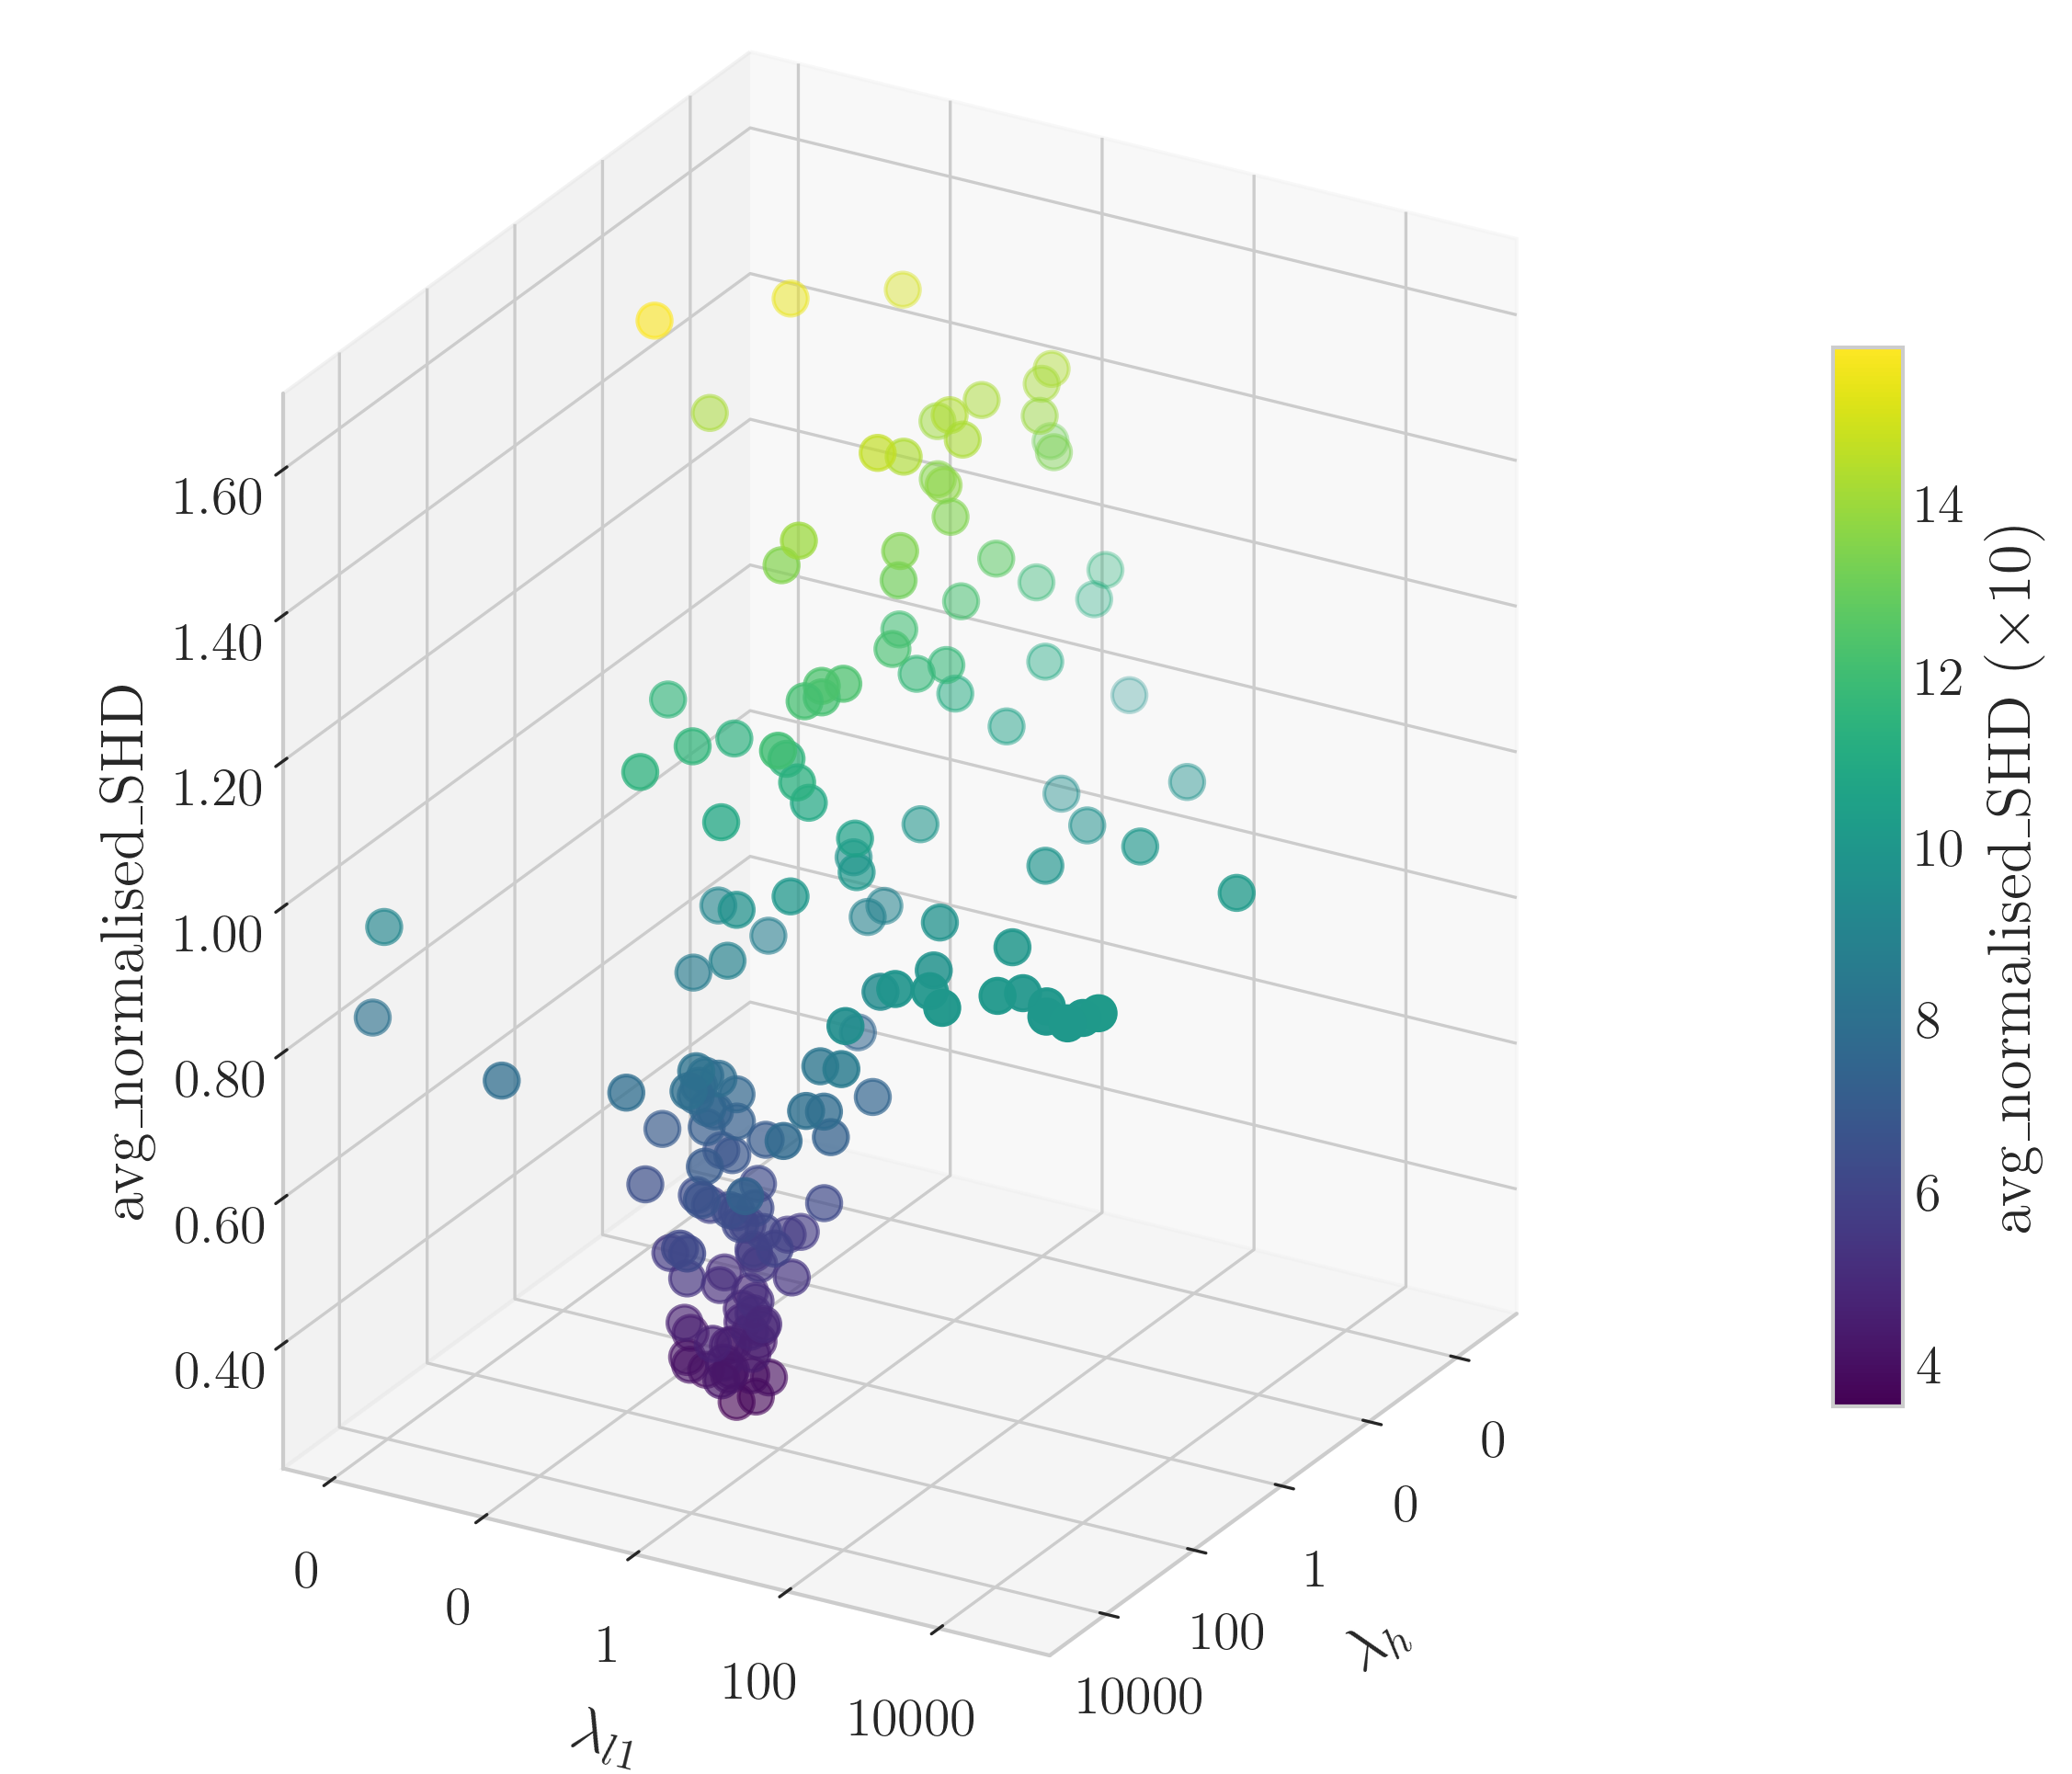

In [55]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from matplotlib.ticker import FuncFormatter

# Use a publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

file_path = "hsearch_mixed_intermediate_best.txt"

# --- Data Extraction ---
lam_h_vals = []
lam_l1_vals = []
avg_shd_vals = []

pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalised_SHD=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_shd_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check file format or regex.")

# Convert lists to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
shd = np.array(avg_shd_vals)

print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_shd range:", shd.min(), "to", shd.max())

# Safety: Filter out non-positive values.
mask = (lam_h > 0) & (lam_l1 > 0) & (shd > 0)
lam_h = lam_h[mask]
lam_l1 = lam_l1[mask]
shd = shd[mask]

# --- Subsample Data ---
bins = np.linspace(shd.min(), shd.max(), 11)  # 11 edges for 10 bins
digitized = np.digitize(shd, bins, right=False)
np.random.seed(42)
selected_indices = []
for b in range(1, len(bins)):
    inds = np.where(digitized == b)[0]
    if len(inds) > 20:
        selected = np.random.choice(inds, size=20, replace=False)
    else:
        selected = inds
    selected_indices.extend(selected)

lam_h_sub = lam_h[selected_indices]
lam_l1_sub = lam_l1[selected_indices]
shd_sub = shd[selected_indices]

print("Subsampled to", len(lam_h_sub), "points.")

# --- Data Transformation for 3D Plot ---
# Transform x and y via log10.
X = np.log10(lam_h_sub)
Y = np.log10(lam_l1_sub)
# For z, keep raw but apply vertical exaggeration.
exaggeration_factor = 10.0
Z_ex = shd_sub * exaggeration_factor

# --- Plotting ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "figure.dpi": 300,
})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X, Y, Z_ex, c=Z_ex, cmap='viridis', marker='o', s=80)

# Custom tick formatter for x and y: convert log10 value back to raw.
def raw_formatter(val, pos):
    return f"{10**val:.0f}"
ax.xaxis.set_major_formatter(FuncFormatter(raw_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(raw_formatter))

# For z, show the raw (unexaggerated) value.
def z_formatter(val, pos):
    return f"{val/exaggeration_factor:.2f}"
ax.zaxis.set_major_formatter(FuncFormatter(z_formatter))

# Compute padded limits.
x_min, x_max = X.min(), X.max()
y_min, y_max = Y.min(), Y.max()
z_min, z_max = Z_ex.min(), Z_ex.max()

x_pad = (x_max - x_min) * 0.05
y_pad = (y_max - y_min) * 0.05
ax.set_xlim(x_min - x_pad, x_max + x_pad)
ax.set_ylim(y_min - y_pad, y_max + y_pad)

z_pad = (z_max - z_min) * 0.1
ax.set_zlim(z_min - z_pad, z_max + z_pad)

# Increase label padding to prevent cut-off.
ax.set_xlabel(r"$\lambda_h$", labelpad=8)
ax.set_ylabel(r"$\lambda_{l1}$", labelpad=8)
ax.set_zlabel(r"$\mathrm{avg\_normalised\_SHD}$", labelpad=8)

# Use orthographic projection.
ax.set_proj_type("ortho")

# Set 3D box aspect ratio.
x_range = X.max() - X.min()
y_range = Y.max() - Y.min()
z_range = z_max - z_min
ax.set_box_aspect((x_range, y_range, z_range))

ax.tick_params(axis="both", which="major", labelsize=14)
ax.view_init(elev=25, azim=30)

cbar = fig.colorbar(sc, shrink=0.6, aspect=15)
cbar.set_label(r"$\mathrm{avg\_normalised\_SHD}\ (\times %g)$" % exaggeration_factor, fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Increase subplot margins to avoid cutting off labels.
fig.subplots_adjust(top=0.95, bottom=0.15, left=0.18, right=0.95)
plt.show()


Extracted 1350 data points.
lam_h range: 1.0347193318364435e-05 to 95440.15169436776
lam_l1 range: 1.0687319549878526e-05 to 99902.9763056494
avg_shd range: 0.33091269841269844 to 1.6652513227513228
Subsampled to 161 points.


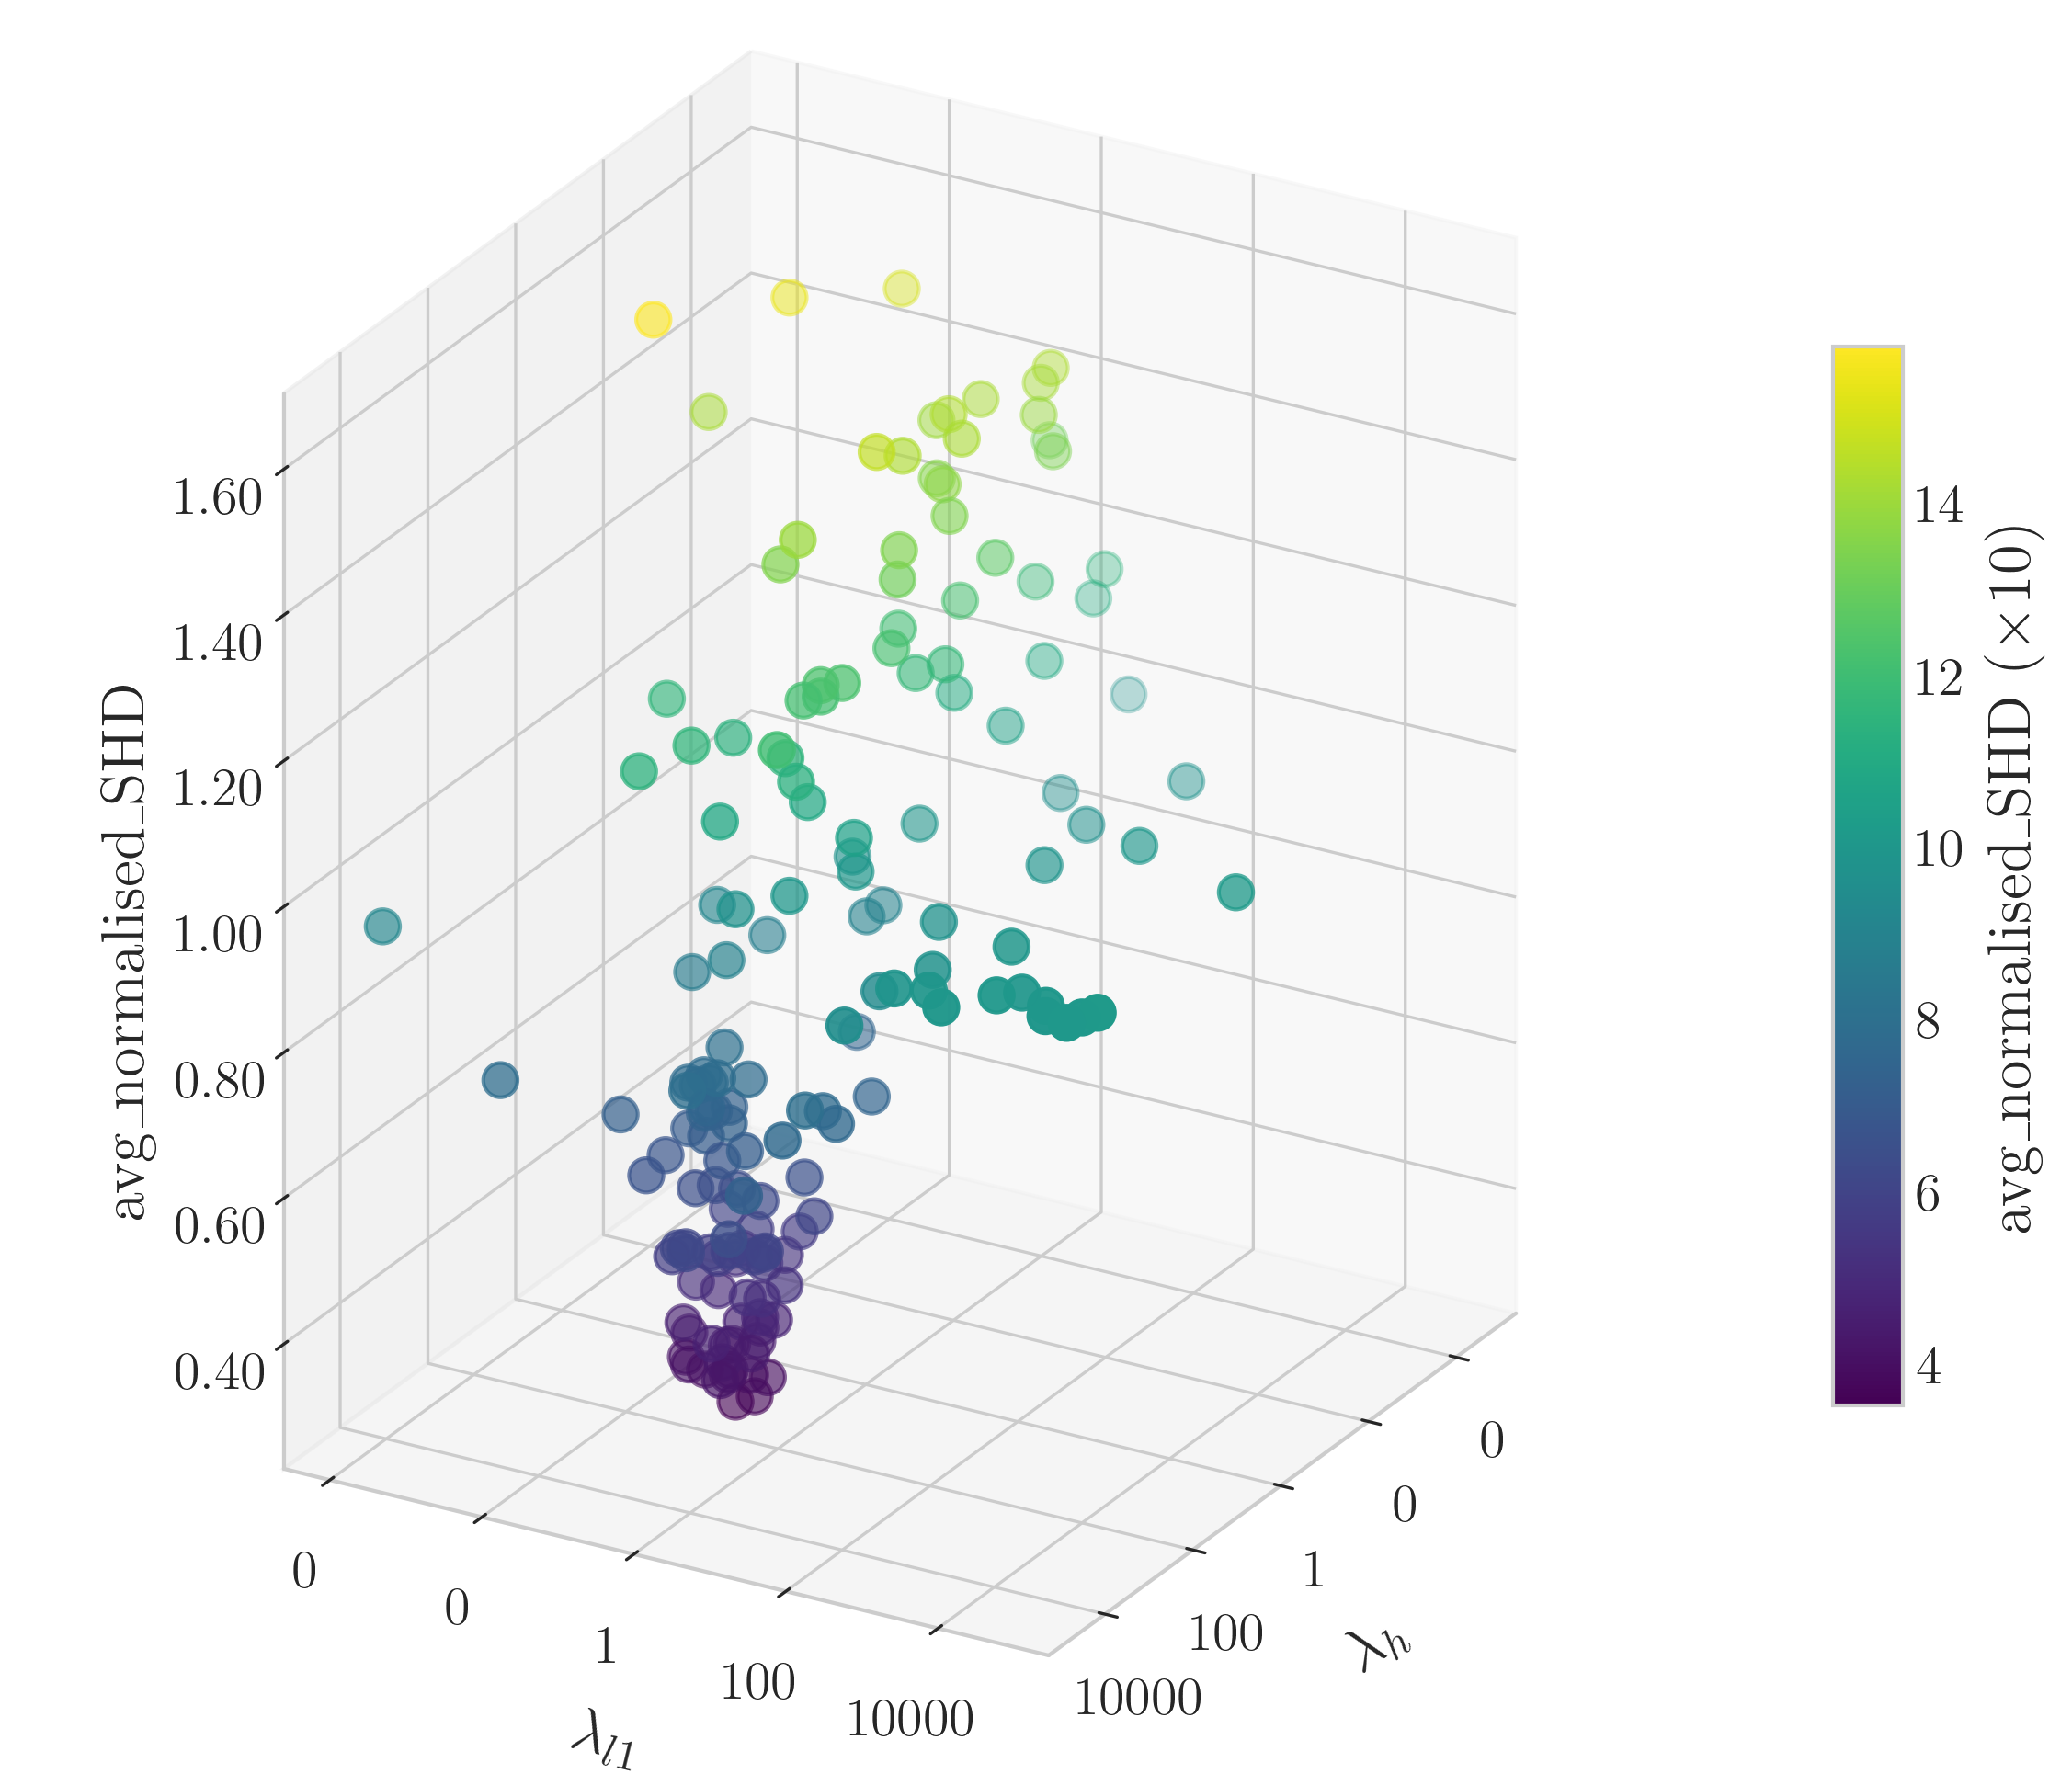

In [56]:
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from matplotlib.ticker import FuncFormatter

# Use a publication-friendly style.
try:
    plt.style.use("seaborn-v0_8-whitegrid")
except Exception:
    plt.style.use("default")

file_path = "hsearch_mixed_intermediate_best.txt"

# --- Data Extraction ---
lam_h_vals = []
lam_l1_vals = []
avg_shd_vals = []

pattern = re.compile(
    r"trial_params=\{'lam_h': ([\d.eE+\-]+), 'lam_l1': ([\d.eE+\-]+)\}, avg_normalised_SHD=([\d.eE+\-]+)"
)

with open(file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            lam_h_vals.append(float(match.group(1)))
            lam_l1_vals.append(float(match.group(2)))
            avg_shd_vals.append(float(match.group(3)))

print("Extracted", len(lam_h_vals), "data points.")
if not lam_h_vals:
    raise ValueError("No data was extracted. Check file format or regex.")

# Convert lists to numpy arrays.
lam_h = np.array(lam_h_vals)
lam_l1 = np.array(lam_l1_vals)
shd = np.array(avg_shd_vals)

print("lam_h range:", lam_h.min(), "to", lam_h.max())
print("lam_l1 range:", lam_l1.min(), "to", lam_l1.max())
print("avg_shd range:", shd.min(), "to", shd.max())

# Safety: Filter out non-positive values.
mask = (lam_h > 0) & (lam_l1 > 0) & (shd > 0)
lam_h = lam_h[mask]
lam_l1 = lam_l1[mask]
shd = shd[mask]

# --- Subsample Data ---
bins = np.linspace(shd.min(), shd.max(), 11)  # 11 edges for 10 bins
digitized = np.digitize(shd, bins, right=False)
np.random.seed(42)
selected_indices = []
for b in range(1, len(bins)):
    inds = np.where(digitized == b)[0]
    if len(inds) > 20:
        selected = np.random.choice(inds, size=20, replace=False)
    else:
        selected = inds
    selected_indices.extend(selected)

lam_h_sub = lam_h[selected_indices]
lam_l1_sub = lam_l1[selected_indices]
shd_sub = shd[selected_indices]

print("Subsampled to", len(lam_h_sub), "points.")

# --- Data Transformation for 3D Plot ---
# For x and y, take log10 so points are placed in log-space.
X = np.log10(lam_h_sub)
Y = np.log10(lam_l1_sub)
# For z, keep raw but apply vertical exaggeration.
exaggeration_factor = 10.0
Z_ex = shd_sub * exaggeration_factor

# --- Plotting ---
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "figure.dpi": 300,
})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X, Y, Z_ex, c=Z_ex, cmap='viridis', marker='o', s=80)

# Custom tick formatter for x and y: convert log10 value back to raw.
def raw_formatter(val, pos):
    return f"{10**val:.0f}"
ax.xaxis.set_major_formatter(FuncFormatter(raw_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(raw_formatter))

# For z, show the raw (unexaggerated) value.
def z_formatter(val, pos):
    return f"{val/exaggeration_factor:.2f}"
ax.zaxis.set_major_formatter(FuncFormatter(z_formatter))

# Compute padded limits.
x_min, x_max = X.min(), X.max()
y_min, y_max = Y.min(), Y.max()
z_min, z_max = Z_ex.min(), Z_ex.max()

x_pad = (x_max - x_min) * 0.05
y_pad = (y_max - y_min) * 0.05
ax.set_xlim(x_min - x_pad, x_max + x_pad)
ax.set_ylim(y_min - y_pad, y_max + y_pad)

z_pad = (z_max - z_min) * 0.1
ax.set_zlim(z_min - z_pad, z_max + z_pad)

# Use reduced label padding (as per your adjustment).
ax.set_xlabel(r"$\lambda_h$", labelpad=8)
ax.set_ylabel(r"$\lambda_{l1}$", labelpad=8)
ax.set_zlabel(r"$\mathrm{avg\_normalised\_SHD}$", labelpad=8)

# Use orthographic projection.
ax.set_proj_type("ortho")

# Set the 3D box aspect ratio.
x_range = X.max() - X.min()
y_range = Y.max() - Y.min()
z_range = z_max - z_min
ax.set_box_aspect((x_range, y_range, z_range))

ax.tick_params(axis="both", which="major", labelsize=14)
ax.view_init(elev=25, azim=30)

cbar = fig.colorbar(sc, shrink=0.6, aspect=15)
cbar.set_label(r"$\mathrm{avg\_normalised\_SHD}\ (\times %g)$" % exaggeration_factor, fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Adjust subplot margins to ensure labels are fully visible.
fig.subplots_adjust(top=0.95, bottom=0.15, left=0.18, right=0.95)
plt.show()
